# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LinearSegmentedColormap
pd.set_option('display.max_columns', 100)
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
import datetime as dt

# Read Datasets

In [2]:
Direc = '/Users/hermione/Documents/Monroe College/Winter 2024/Data Science/Final/Datasets'

filenames = os.listdir(Direc)
filenames = [f.replace('olist_', '').replace('.csv', '') for f in filenames if f.endswith(".csv")]
table = {}
for f in filenames:
  path = '/Users/hermione/Documents/Monroe College/Winter 2024/Data Science/Final/Datasets/olist_' + f + '.csv'

  table[f] = pd.read_csv(path)

# Take a look at the files
print(filenames)

['sellers_dataset', 'orders_dataset', 'order_items_dataset', 'product_category_name_translation', 'customers_dataset', 'geolocation_dataset', 'order_payments_dataset', 'order_reviews_dataset', 'products_dataset']


In [3]:
products = table['products_dataset']
order_payments = table['order_payments_dataset']
order_items = table['order_items_dataset']
customers = table['customers_dataset']
sellers = table['sellers_dataset']
orders = table['orders_dataset']
order_reviews = table['order_reviews_dataset']
geolocation = table['geolocation_dataset']
product_category_name_translation = table['product_category_name_translation']

# Exploratory Data Analysis (EDA)

In [4]:
# Collections for each dataset
# datasets = table['customers_dataset'], table['order_items_dataset'], table['order_payments_dataset'], table['orders_dataset'], table['order_reviews_dataset'], table['products_dataset'], table['sellers_dataset'], table['product_category_name_translation'], table['geolocation_dataset']]
datasets = [customers, order_items, order_payments, orders, order_reviews, products, sellers, product_category_name_translation, geolocation]

names = ['customers_dataset', 'order_items_dataset', 'order_payments_dataset', 'orders_dataset', 'order_reviews_dataset', 'products_dataset', 'sellers_dataset', 'product_category_name_translation', 'geolocation_dataset']

# Creating a DataFrame with useful information about all datasets
data_info = pd.DataFrame({})
data_info['dataset'] = names
data_info['n_rows'] = [df.shape[0] for df in datasets]
data_info['n_cols'] = [df.shape[1] for df in datasets]
data_info['null_amount'] = [df.isnull().sum().sum() for df in datasets]
data_info['qty_null_columns'] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
data_info['null_columns'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]

data_info.style.background_gradient()

# Data Analysis & Visualization

## Orders Analysis
In this section, I am going to look at the following things:

1. Orders Status Distribution
2. Orders Trend from 2016 to 2018
3. Purchasing Behavior

The datasets we are using include: Orders, Order_items, Products, Product Category Name Translation	

In [5]:
orders

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0        delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...            ...                      ...                  ...   
99436    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
99437    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
99438    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
99439    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99436          2017-03-10 11:18:03           2017-03-17 15:08:01   
99437          2018-02-07 23:22:42           2018-02-28 17:37:56   
99438          2017-08-28 20:52:26           2017-09-21 11:24:17   
99439          2018-01-12 15:35:03           2018-01-25 23:32:54   
99440          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date  
0               2017-10-18 00:00:00  
1               2018-08-13 00:00:00  
2               2018-09-04 00:00:00  
3               2017-12-15 00:00:00  
4               2018-02-26 00:00:00  
...                             ...  
99436           2017-03-28 00:00:00  
99437           2018-03-02 00:00:00  
99438           2017-09-27 00:00:00  
99439           2018-02-15 00:00:00  
99440           2018-04-03 00:00:00  

[99441 rows x 8 columns]

In [6]:
# Convert time-related columns into datetime format
datetime_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in datetime_cols:
  orders[col] = pd.to_datetime(orders[col])

shipping_limit_datetime = pd.to_datetime(order_items['shipping_limit_date'])

### 1. Orders Status Distribution
How many orders do we have for each status?

In [7]:
order_status_counts = orders['order_status'].value_counts()
order_status_counts

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

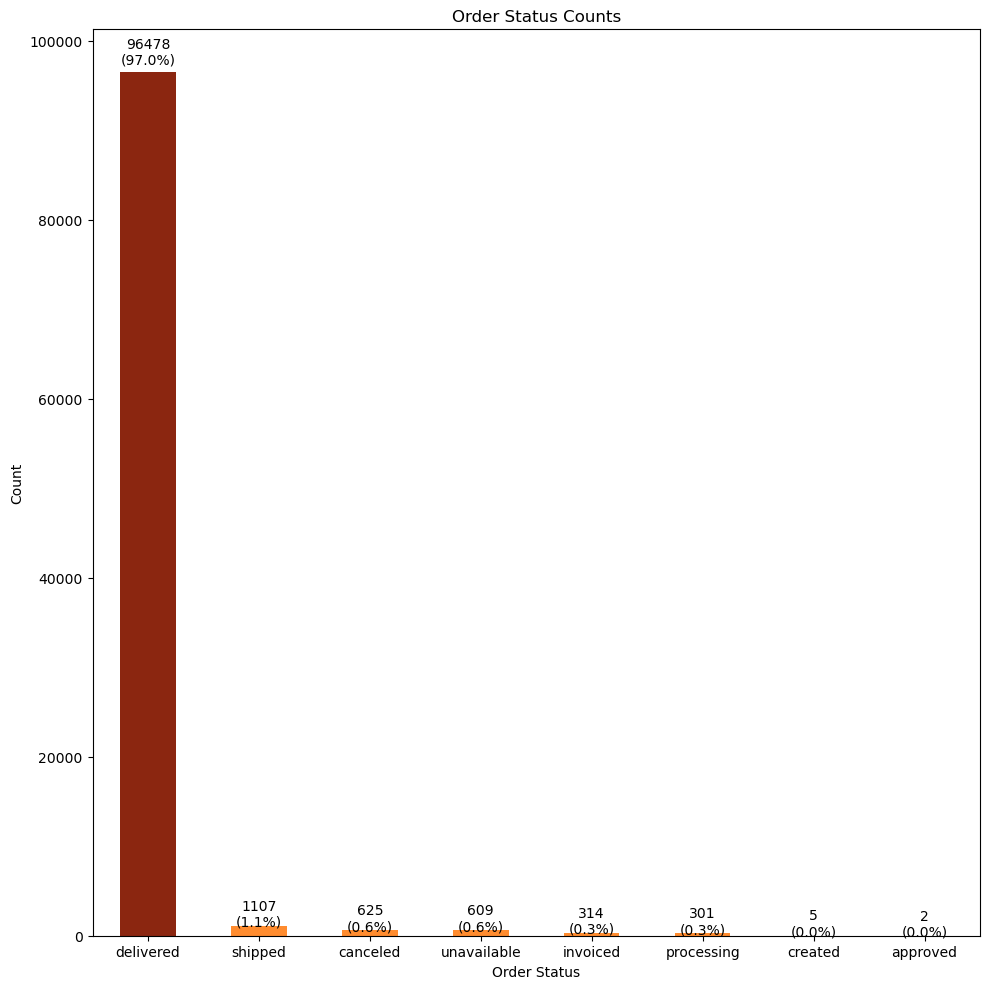

In [8]:
# Create a new figure with a specific size (width, height)
plt.figure(figsize=(10, 10))

# Create a color list
# 'skyblue' if the value is not the max value, 'darkblue' if it is
colors = ['#8b2610' if x == max(order_status_counts) else '#ff8c2f' for x in order_status_counts]

# Create the bar chart with custom colors
ax = order_status_counts.plot(kind='bar', color=colors)

# Rotate x-axis labels to be horizontal
plt.xticks(rotation=0)

plt.xlabel('Order Status')
plt.ylabel('Count')
plt.title('Order Status Counts')

total = order_status_counts.sum()

# Add count numbers and percentage on top of each bar, each on a separate line
for p in ax.patches:
    count = p.get_height()
    percentage = '{:.1f}%'.format(100 * count/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() * 1.01
    ax.annotate(f'{count}\n({percentage})', (x, y), ha='center')

# Adjust layout to make sure everything fits
plt.tight_layout()

plt.savefig('Order Status Counts.png')

plt.show()

Most orders were delivered, but still have around 3% of the orders were undelivered.

### 2. Orders Trend from 2016 to 2018

In [9]:
# Extract the year from 'order_purchase_timestamp'
orders['year'] = orders['order_purchase_timestamp'].dt.year

# Get a list of unique years
unique_years =orders['year'].unique()

# Extract year and month from 'order_purchase_timestamp' to a new column 'year_month'
orders['year_month'] = orders['order_purchase_timestamp'].dt.to_period('M')

# Group by 'year_month' and count the number of orders
orders_per_month = orders.groupby('year_month').size()

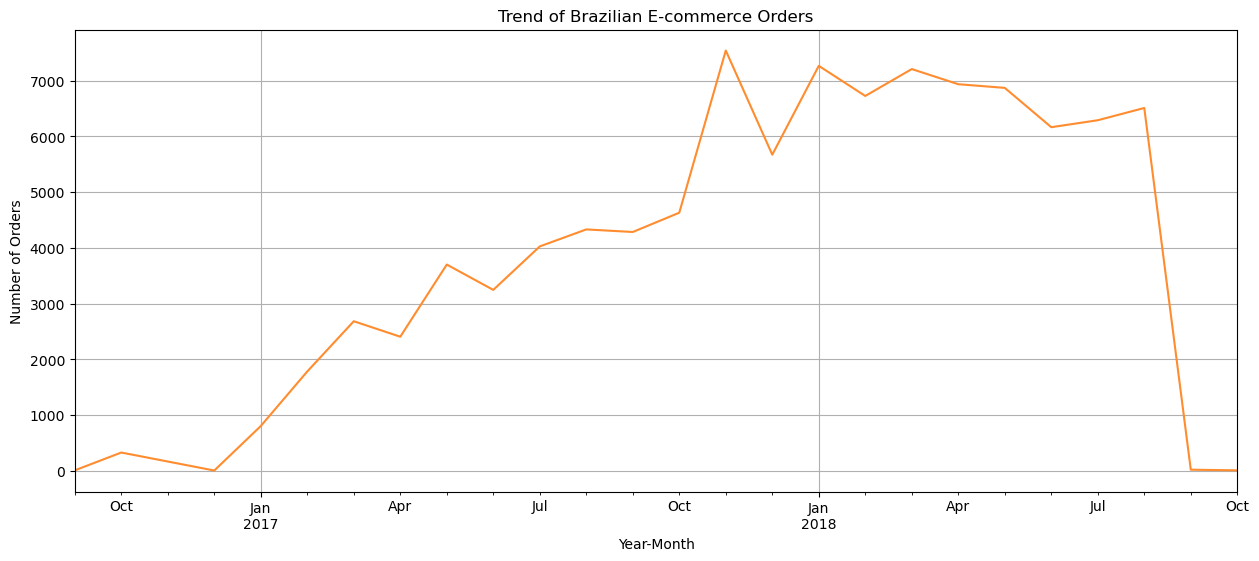

In [10]:
# Plot
# Create a new figure
plt.figure(figsize=(15,6))

# Create the plot
orders_per_month.plot(kind='line', color='#ff8c2f')

# Set the title and labels
plt.title('Trend of Brazilian E-commerce Orders')
plt.xlabel('Year-Month')
plt.ylabel('Number of Orders')

# Enable the grid
plt.grid(True)

# Show the plot
plt.show()

Check 2018 data and remove data if not valuable for analysis

In [11]:
# Convert PeriodIndex to DatetimeIndex
orders_per_month.index = orders_per_month.index.to_timestamp()

# Filter the data for the year 2018
orders_2018 = orders.loc[orders['year'] == 2018].copy()

# Extract the month from 'order_purchase_timestamp'
orders_2018['month'] = orders_2018['order_purchase_timestamp'].dt.month

# Group by 'month' and count the number of orders
orders_per_month_2018 = orders_2018.groupby('month').size()

orders_per_month_2018

month
1     7269
2     6728
3     7211
4     6939
5     6873
6     6167
7     6292
8     6512
9       16
10       4
dtype: int64

September and October 2028 had pretty low data, which is not normal for the trend.
I will delete September and October 2018 data to create a more accurate trend for analysis.

In [12]:
# Create a new objective with removed data

# Convert data
orders['month'] = orders['order_purchase_timestamp'].dt.month
orders['year'] = orders['order_purchase_timestamp'].dt.year

# Filter out September and October 2018
filtered_orders = orders[~((orders['month'].isin([9, 10])) & (orders['year'] == 2018))].drop(columns=['month', 'year'])

In [13]:
# Show the trend again

# Extract the year from 'order_purchase_timestamp'
filtered_orders['year'] = filtered_orders['order_purchase_timestamp'].dt.year

# Get a list of unique years
unique_years =filtered_orders['year'].unique()

# Extract year and month from 'order_purchase_timestamp' to a new column 'year_month'
filtered_orders['year_month'] = filtered_orders['order_purchase_timestamp'].dt.to_period('M')

# Group by 'year_month' and count the number of orders
orders_per_month = filtered_orders.groupby('year_month').size()

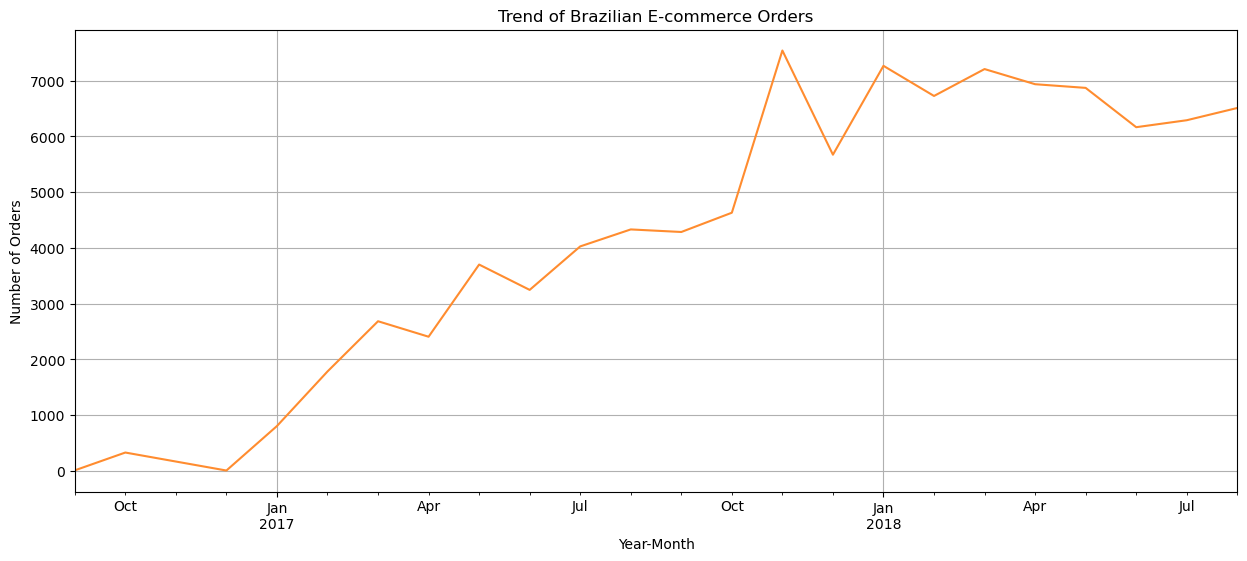

In [14]:
# Plot
# Create a new figure
plt.figure(figsize=(15,6))

# Create the plot
orders_per_month.plot(kind='line', color='#ff8c2f')

# Set the title and labels
plt.title('Trend of Brazilian E-commerce Orders')
plt.xlabel('Year-Month')
plt.ylabel('Number of Orders')

# Enable the grid
plt.grid(True)

plt.savefig('Trend of Brazilian E-commerce Orders.png')

# Show the plot
plt.show()

From the data, the trend showed that people were more and more rely on E-commerce from 2016 to 2018.

### 3. Purchasing Behavior

#### a. On what day of the week do brazilians customers tend to do online purchasing?

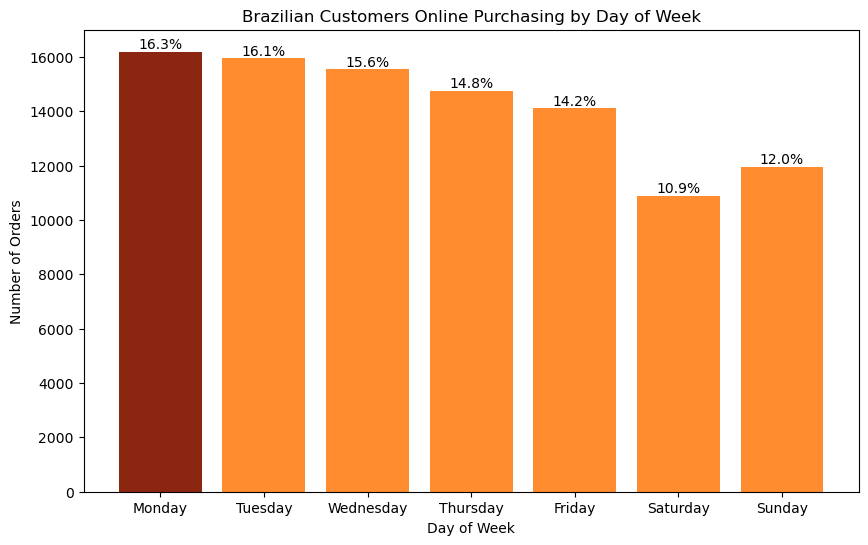

In [15]:
# Extract the day of the week from 'order_purchase_timestamp'
filtered_orders['day_of_week'] = filtered_orders['order_purchase_timestamp'].dt.dayofweek

# Count the number of orders for each day of the week
orders_per_day = filtered_orders['day_of_week'].value_counts().sort_index()

# Calculate the percentages
percentages = 100 * orders_per_day / orders_per_day.sum()

# Define the names for the days of the week
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a color list
# 'skyblue' if the value is not the max value, 'darkblue' if it is
colors = ['#8b2610' if x == max(orders_per_day) else '#ff8c2f' for x in orders_per_day]

# Create a new figure
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart
bars = ax.bar(day_names, orders_per_day, color=colors)

# Set the title and labels
ax.set_title('Brazilian Customers Online Purchasing by Day of Week')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Number of Orders')

# Add percentages on top of each bar
for bar, percentage in zip(bars, percentages):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{percentage:.1f}%', ha='center', va='bottom')
    
plt.savefig('Brazilian Customers Online Purchasing by Day of Week.png')

# Show the plot
plt.show()

People tend to do online shopping after the weekends, especially on Monday.

#### b. What time do Brazilian customers tend to buy (Dawn, Morning, Afternoon, or Night)?

In [16]:
# Create a function to categorize each purchase into a time period
def categorize_time(x):
    if (x >= 0) and (x < 6):
        return 'Dawn'
    elif (x >= 6) and (x < 12):
        return 'Morning'
    elif (x >= 12) and (x < 18):
        return 'Afternoon'
    else:
        return 'Night'

# Extract the hour from 'order_purchase_timestamp'
filtered_orders['hour_of_day'] = filtered_orders['order_purchase_timestamp'].dt.hour

# Apply the function to categorize each purchase into a time period
filtered_orders['time_period'] = filtered_orders['hour_of_day'].apply(categorize_time)

# Define the order_period
order_period = ['Dawn', 'Morning', 'Afternoon', 'Night']

# Convert 'time_period' to Categorical type and define its order
filtered_orders['time_period'] = pd.Categorical(
    filtered_orders['time_period'], categories=order_period, ordered=True
)

# Count the number of orders for each time period
orders_per_period = filtered_orders['time_period'].value_counts().sort_index()

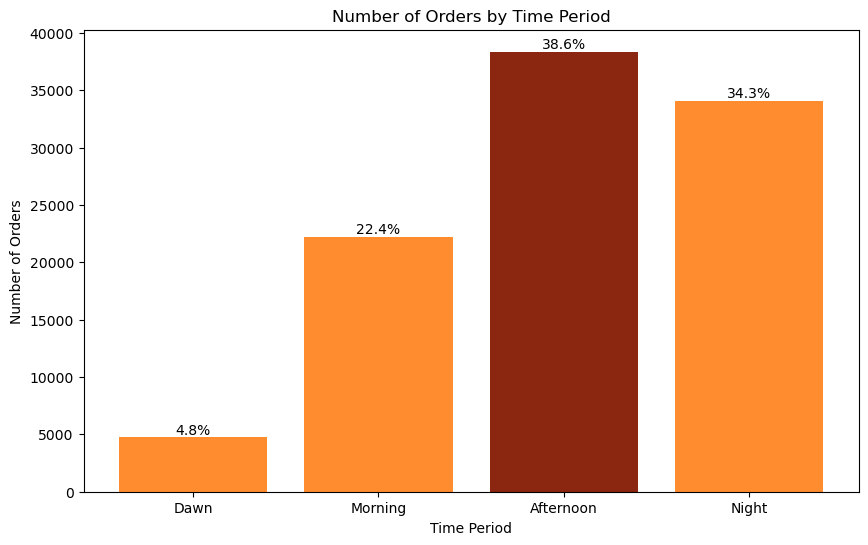

In [17]:
# Calculate the percentages
percentages = 100 * orders_per_period / orders_per_period.sum()

# Create a color list
colors = ['#8b2610' if x == max(orders_per_period) else '#ff8c2f' for x in orders_per_period]

# Create a new figure
fig, ax = plt.subplots(figsize=(10,6))

# Create the bar chart
bars = ax.bar(orders_per_period.index, orders_per_period, color=colors)

# Set the title and labels
ax.set_title('Number of Orders by Time Period')
ax.set_xlabel('Time Period')
ax.set_ylabel('Number of Orders')

# Add percentages on top of each bar
for bar, percentage in zip(bars, percentages):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{percentage:.1f}%', ha='center', va='bottom')

plt.savefig('Number of Orders by Time Period.png')
    
# Show the plot
plt.show()

Most people purchased in the afternoon and at night. Afternoon (12PM-6PM) had the highest purchases of all.

#### c. What is the most ordered product category?

In [18]:
# Join Products and Product Category Name Translation datasets
products_updated = products.merge(product_category_name_translation, on='product_category_name', how='left')

# Check null
english_null = products_updated['product_category_name_english'].isnull()
category_not_null = products_updated['product_category_name'].notnull()

condition = english_null & category_not_null
result = products_updated[condition]

# Update it if null
products_updated.loc[products_updated['product_category_name'] == 'pc_gamer', 'product_category_name_english'] = 'pc_gamer'
products_updated.loc[products_updated['product_category_name'] == 'portateis_cozinha_e_preparadores_de_alimentos', 'product_category_name_english'] = 'kitchen_and_food_preparation_portables'
products_updated.loc[products_updated['product_category_name'].isnull(), 'product_category_name_english'] = 'others'

products_updated = products_updated.drop(columns=['product_category_name'])
products_updated = products_updated.rename(columns={'product_category_name_english': 'product_category_name'})
products_updated

product_id  product_name_lenght  \
0      1e9e8ef04dbcff4541ed26657ea517e5                 40.0   
1      3aa071139cb16b67ca9e5dea641aaa2f                 44.0   
2      96bd76ec8810374ed1b65e291975717f                 46.0   
3      cef67bcfe19066a932b7673e239eb23d                 27.0   
4      9dc1a7de274444849c219cff195d0b71                 37.0   
...                                 ...                  ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                 45.0   
32947  bf4538d88321d0fd4412a93c974510e6                 41.0   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                 50.0   
32949  83808703fc0706a22e264b9d75f04a2e                 60.0   
32950  106392145fca363410d287a815be6de4                 58.0   

       product_description_lenght  product_photos_qty  product_weight_g  \
0                           287.0                 1.0             225.0   
1                           276.0                 1.0            1000.0   
2                           250.0                 1.0             154.0   
3                           261.0                 1.0             371.0   
4                           402.0                 4.0             625.0   
...                           ...                 ...               ...   
32946                        67.0                 2.0           12300.0   
32947                       971.0                 1.0            1700.0   
32948                       799.0                 1.0            1400.0   
32949                       156.0                 2.0             700.0   
32950                       309.0                 1.0            2083.0   

       product_length_cm  product_height_cm  product_width_cm  \
0                   16.0               10.0              14.0   
1                   30.0               18.0              20.0   
2                   18.0                9.0              15.0   
3                   26.0                4.0              26.0   
4                   20.0               17.0              13.0   
...                  ...                ...               ...   
32946               40.0               40.0              40.0   
32947               16.0               19.0              16.0   
32948               27.0                7.0              27.0   
32949               31.0               13.0              20.0   
32950               12.0                2.0               7.0   

           product_category_name  
0                      perfumery  
1                            art  
2                 sports_leisure  
3                           baby  
4                     housewares  
...                          ...  
32946            furniture_decor  
32947  construction_tools_lights  
32948             bed_bath_table  
32949      computers_accessories  
32950             bed_bath_table  

[32951 rows x 9 columns]

In [19]:
# Save the DataFrame to CSV for future reference
products_updated.to_csv('products_updated.csv', index=False)

In [20]:
# Merge orders with order_items
order_info = pd.merge(filtered_orders, order_items, on='order_id', how='right')

# Then merge the resulting dataframe with n_products
order_info = pd.merge(order_info, products_updated, on='product_id', how='right')

In [21]:
order_info

order_id                       customer_id  \
0       e17e4f88e31525f7deef66779844ddce  f8a3e963a310aa58b60a5b1fed5bceb5   
1       5236307716393b7114b53ee991f36956  03fc97548af8f58fefc768d12b546c9c   
2       01f66e58769f84129811d43eefd187fb  e41819d1c95c12c9ce495b630eab8aee   
3       143d00a4f2dde4e0364ee1821577adb3  322162b5ca010c2b059cb5224dd818b1   
4       86cafb8794cb99a9b1b77fc8e48fbbbb  c11c31965ff02cc1d7132df8edfcbc22   
...                                  ...                               ...   
112645  59e88b7d3675e89aceaf86f372d3bc9a  e750210dde7e68dbd5194c0809e97f7e   
112646  6e4465d771f02e4fe335225de3c6c043  0f139d1b208a62a37671423e5eff5016   
112647  6e4465d771f02e4fe335225de3c6c043  0f139d1b208a62a37671423e5eff5016   
112648  6e4465d771f02e4fe335225de3c6c043  0f139d1b208a62a37671423e5eff5016   
112649  f3a47ba087f05d39a74ed1b653f0be1b  b7fbfcea57659b5d18c20c95db45e908   

       order_status order_purchase_timestamp   order_approved_at  \
0         delivered      2018-04-24 16:16:53 2018-04-24 19:04:19   
1         delivered      2018-01-31 18:55:36 2018-01-31 19:11:15   
2         delivered      2018-07-09 21:18:01 2018-07-09 21:30:20   
3         delivered      2018-08-03 08:55:50 2018-08-03 09:31:42   
4         delivered      2018-04-11 01:06:37 2018-04-11 01:30:23   
...             ...                      ...                 ...   
112645    delivered      2018-01-03 15:05:53 2018-01-04 05:14:57   
112646    delivered      2018-03-06 11:51:44 2018-03-08 02:49:35   
112647    delivered      2018-03-06 11:51:44 2018-03-08 02:49:35   
112648    delivered      2018-03-06 11:51:44 2018-03-08 02:49:35   
112649    delivered      2018-06-28 08:15:31 2018-06-28 08:30:34   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2018-04-25 17:01:00           2018-04-27 16:42:17   
1               2018-02-05 22:44:47           2018-02-16 13:27:08   
2               2018-07-10 11:49:00           2018-07-11 23:24:16   
3               2018-08-03 11:48:00           2018-08-06 15:14:32   
4               2018-04-12 22:56:27           2018-04-13 22:41:44   
...                             ...                           ...   
112645          2018-01-04 15:57:18           2018-01-15 20:39:35   
112646          2018-03-08 23:16:19           2018-03-23 20:08:40   
112647          2018-03-08 23:16:19           2018-03-23 20:08:40   
112648          2018-03-08 23:16:19           2018-03-23 20:08:40   
112649          2018-06-28 14:31:00           2018-07-03 20:46:26   

       order_estimated_delivery_date year_month    year  day_of_week  \
0                         2018-05-09    2018-04  2018.0          1.0   
1                         2018-02-22    2018-01  2018.0          2.0   
2                         2018-07-18    2018-07  2018.0          0.0   
3                         2018-08-08    2018-08  2018.0          4.0   
4                         2018-04-26    2018-04  2018.0          2.0   
...                              ...        ...     ...          ...   
112645                    2018-02-02    2018-01  2018.0          2.0   
112646                    2018-04-05    2018-03  2018.0          1.0   
112647                    2018-04-05    2018-03  2018.0          1.0   
112648                    2018-04-05    2018-03  2018.0          1.0   
112649                    2018-07-20    2018-06  2018.0          3.0   

        hour_of_day time_period  order_item_id  \
0              16.0   Afternoon              1   
1              18.0       Night              1   
2              21.0       Night              1   
3               8.0     Morning              1   
4               1.0        Dawn              1   
...             ...         ...            ...   
112645         15.0   Afternoon              2   
112646         11.0     Morning              1   
112647         11.0     Morning              2   
112648         11.0     Morning              3   
112649          8.0     Morning   

In [22]:
# Save the DataFrame to CSV for future reference
order_info.to_csv('order_info.csv', index=False)

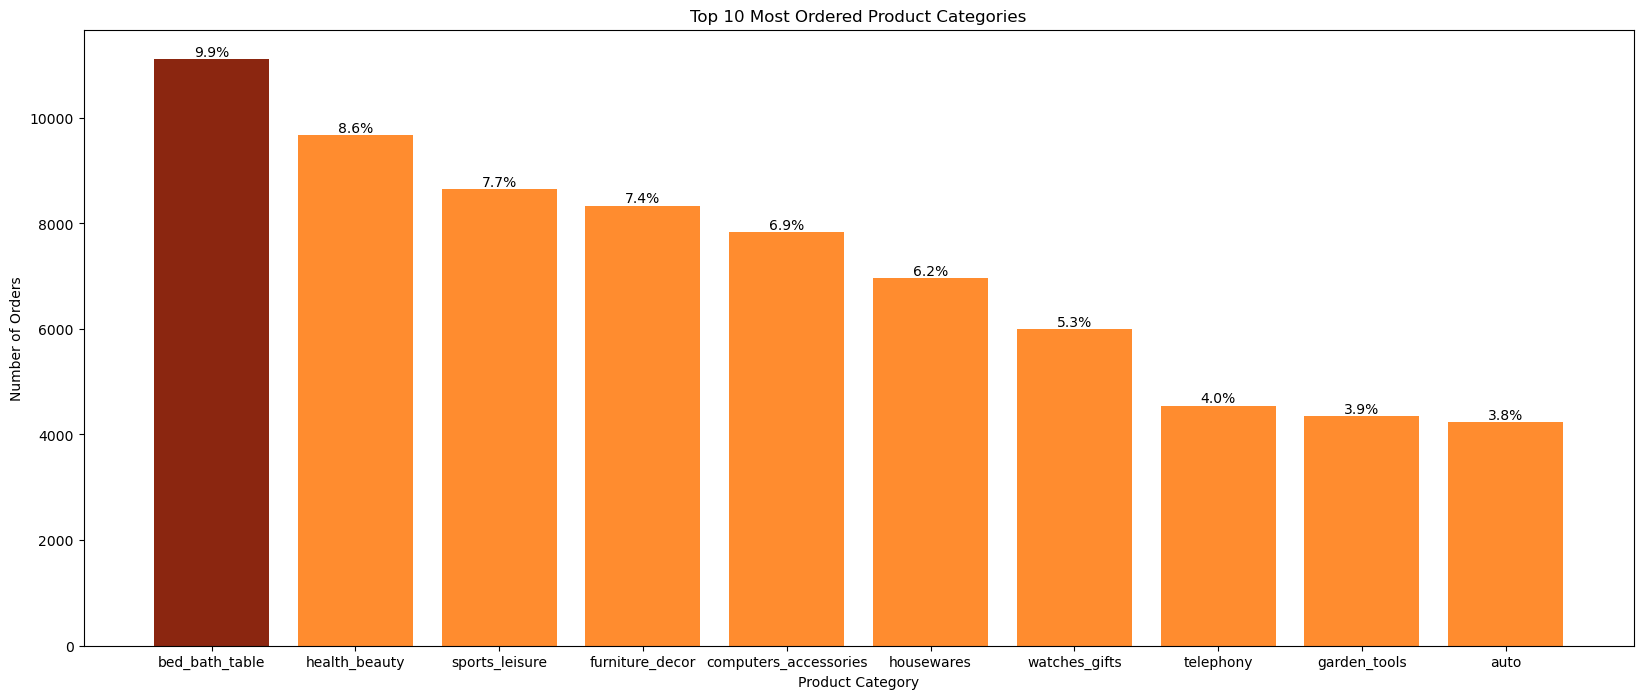

In [23]:
# Count the number of orders for each product category
category_counts = order_info['product_category_name'].value_counts()

# Get the top 10 categories
top_categories = category_counts.head(10)

# Calculate the percentages
percentages = 100 * top_categories / category_counts.sum()

# Create a color list: 'darkblue' if the value is the max value, 'skyblue' otherwise
colors = ['#8b2610' if x == max(top_categories) else '#ff8c2f' for x in top_categories]

# Create a new figure
fig, ax = plt.subplots(figsize=(20,8))

# Create the bar chart
bars = ax.bar(top_categories.index, top_categories, color=colors)

# Set the title and labels
ax.set_title('Top 10 Most Ordered Product Categories')
ax.set_xlabel('Product Category')
ax.set_ylabel('Number of Orders')

# Rotate x-axis labels for better readability
# plt.xticks(rotation=90)

# Add percentages on top of each bar
for bar, percentage in zip(bars, percentages):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{percentage:.1f}%', ha='center', va='bottom')

plt.savefig('Top 10 Most Ordered Product Categories.png')
    
# Show the plot
plt.show()

Bed, Bath, and Table category is the top puchase product category.

## Review Analysis
In this section, I am going to look at the following things:

1. Orders Review Score
2. Orders Comment
3. Top 4 bad comments among each product

The datasets we are using include: Orders_reviews, Order_items, Products

### 1. Orders Review Socre

In [24]:
order_reviews

review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4                  NaN   
1                 5                  NaN   
2                 5                  NaN   
3                 5                  NaN   
4                 5                  NaN   
...             ...                  ...   
99219             5                  NaN   
99220             5                  NaN   
99221             5                  NaN   
99222             4                  NaN   
99223             1                  NaN   

                                  review_comment_message review_creation_date  \
0                                                    NaN  2018-01-18 00:00:00   
1                                                    NaN  2018-03-10 00:00:00   
2                                                    NaN  2018-02-17 00:00:00   
3                  Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4      Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
...                                                  ...                  ...   
99219                                                NaN  2018-07-07 00:00:00   
99220                                                NaN  2017-12-09 00:00:00   
99221  Excelente mochila, entrega super rápida. Super...  2018-03-22 00:00:00   
99222                                                NaN  2018-07-01 00:00:00   
99223  meu produto chegou e ja tenho que devolver, po...  2017-07-03 00:00:00   

      review_answer_timestamp  
0         2018-01-18 21:46:59  
1         2018-03-11 03:05:13  
2         2018-02-18 14:36:24  
3         2017-04-21 22:02:06  
4         2018-03-02 10:26:53  
...                       ...  
99219     2018-07-14 17:18:30  
99220     2017-12-11 20:06:42  
99221     2018-03-23 09:10:43  
99222     2018-07-02 12:59:13  
99223     2017-07-03 21:01:49  

[99224 rows x 7 columns]

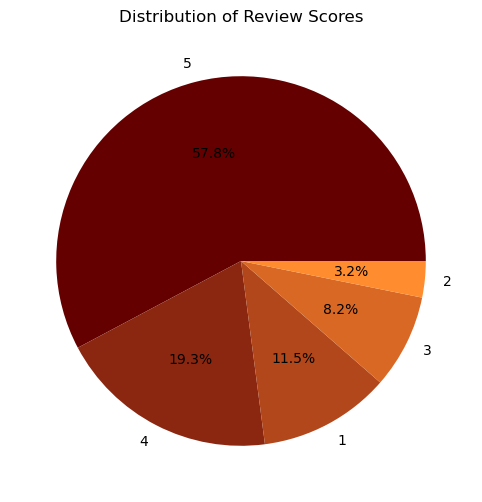

In [25]:
# Get the counts of each review score
score_counts = order_reviews['review_score'].value_counts()

# Define the colors
colors = ['#640000', '#8b2610', '#b2471b', '#d96825', '#ff8c2f']

# Create the pie chart
plt.figure(figsize=(10,6))
plt.pie(score_counts, labels = score_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Review Scores')
plt.savefig('Distribution of Review Scores.png')
plt.show()

Most orders had high review score (4 & 5) ; however, low review score (1 & 2) still had 14.7%.

### 2. Orders Comment

In [26]:
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hermione/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
def analyze_comments(score_values, comment_column):
    # Filter dataframe based on score values
    df_filtered = order_reviews[order_reviews['review_score'].isin(score_values)]

    # Get comments from the specified column
    comments = df_filtered[comment_column].dropna()

    # Convert all comments to lower case, split into words
    words = comments.str.lower().str.split()

    # Flatten the list of lists of words
    words = [word for sublist in words for word in sublist]

    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('portuguese')]

    # Get 15 most common words
    common_words = Counter(words).most_common(15)

    return common_words

# Get common words for different review scores and different columns
common_words_high_scores_title = analyze_comments([5, 4], 'review_comment_title')
common_words_medium_scores_title = analyze_comments([3], 'review_comment_title')
common_words_low_scores_title = analyze_comments([1, 2], 'review_comment_title')

common_words_high_scores_message = analyze_comments([5, 4], 'review_comment_message')
common_words_medium_scores_message = analyze_comments([3], 'review_comment_message')
common_words_low_scores_message = analyze_comments([1, 2], 'review_comment_message')

print("Common words for high scores (title): ", common_words_high_scores_title)
print("Common words for medium scores (title): ", common_words_medium_scores_title)
print("Common words for low scores (title): ", common_words_low_scores_title)

print("Common words for high scores (message): ", common_words_high_scores_message)
print("Common words for medium scores (message): ", common_words_medium_scores_message)
print("Common words for low scores (message): ", common_words_low_scores_message)

Common words for high scores (title):  [('recomendo', 1625), ('bom', 1021), ('super', 887), ('ótimo', 664), ('excelente', 567), ('produto', 462), ('otimo', 346), ('entrega', 322), ('boa', 230), ('10', 230), ('ótima', 195), ('tudo', 186), ('recomendado', 155), ('ok', 124), ('perfeito', 106)]
Common words for medium scores (title):  [('produto', 132), ('bom', 127), ('recomendo', 91), ('entrega', 49), ('recebi', 30), ('boa', 20), ('entregue', 19), ('ok', 13), ('ótimo', 12), ('ainda', 12), ('chegou', 12), ('veio', 11), ('diferente', 11), ('qualidade', 11), ('nao', 10)]
Common words for low scores (title):  [('produto', 614), ('recebi', 221), ('recomendo', 168), ('entrega', 144), ('entregue', 104), ('nao', 99), ('ruim', 91), ('errado', 86), ('veio', 64), ('defeito', 62), ('péssimo', 60), ('chegou', 56), ('pedido', 49), ('ainda', 46), ('péssima', 41)]
Common words for high scores (message):  [('produto', 9065), ('antes', 5214), ('prazo', 4038), ('entrega', 3926), ('chegou', 3885), ('bom', 27

In [28]:
pip install googletrans==4.0.0-rc1

Note: you may need to restart the kernel to use updated packages.


In [29]:
from googletrans import Translator

In [30]:
def analyze_comments(score_values, comment_column):
    # Filter dataframe based on score values
    df_filtered = order_reviews[order_reviews['review_score'].isin(score_values)]

    # Get comments from the specified column
    comments = df_filtered[comment_column].dropna()

    # Convert all comments to lower case, split into words
    words = comments.str.lower().str.split()

    # Flatten the list of lists of words
    words = [word for sublist in words for word in sublist]

    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('portuguese')]

    # Get 15 most common words
    common_words = Counter(words).most_common(15)

    # Translate common words
    translator = Translator()
    common_words_translated = [(translator.translate(word, dest='en').text, count) for word, count in common_words]

    return common_words_translated

# Get common words for different review scores and different columns
common_words_high_scores_title = analyze_comments([5, 4], 'review_comment_title')
common_words_medium_scores_title = analyze_comments([3], 'review_comment_title')
common_words_low_scores_title = analyze_comments([1, 2], 'review_comment_title')

common_words_high_scores_message = analyze_comments([5, 4], 'review_comment_message')
common_words_medium_scores_message = analyze_comments([3], 'review_comment_message')
common_words_low_scores_message = analyze_comments([1, 2], 'review_comment_message')

print("Common words for high scores in English (title): ", common_words_high_scores_title)
print("Common words for medium scores in English (title): ", common_words_medium_scores_title)
print("Common words for low scores in English (title): ", common_words_low_scores_title)

print("Common words for high scores in English (message): ", common_words_high_scores_message)
print("Common words for medium scores in English (message): ", common_words_medium_scores_message)
print("Common words for low scores in English (message): ", common_words_low_scores_message)

Common words for high scores in English (title):  [('I recommend', 1625), ('bom', 1021), ('super', 887), ('excellent', 664), ('great', 567), ('product', 462), ('excellent', 346), ('delivery', 322), ('boa', 230), ('10', 230), ('excellent', 195), ('all', 186), ('recommended', 155), ('ok', 124), ('perfect', 106)]
Common words for medium scores in English (title):  [('product', 132), ('bom', 127), ('I recommend', 91), ('delivery', 49), ('I received', 30), ('boa', 20), ('delivered', 19), ('ok', 13), ('excellent', 12), ('yet', 12), ('it arrived', 12), ('he came', 11), ('different', 11), ('quality', 11), ('nao', 10)]
Common words for low scores in English (title):  [('product', 614), ('I received', 221), ('I recommend', 168), ('delivery', 144), ('delivered', 104), ('nao', 99), ('roomy', 91), ('wrong', 86), ('he came', 64), ('defect', 62), ('terrible', 60), ('it arrived', 56), ('order', 49), ('yet', 46), ('bad', 41)]
Common words for high scores in English (message):  [('product', 9065), ('bef

In [31]:
!pip install wordcloud

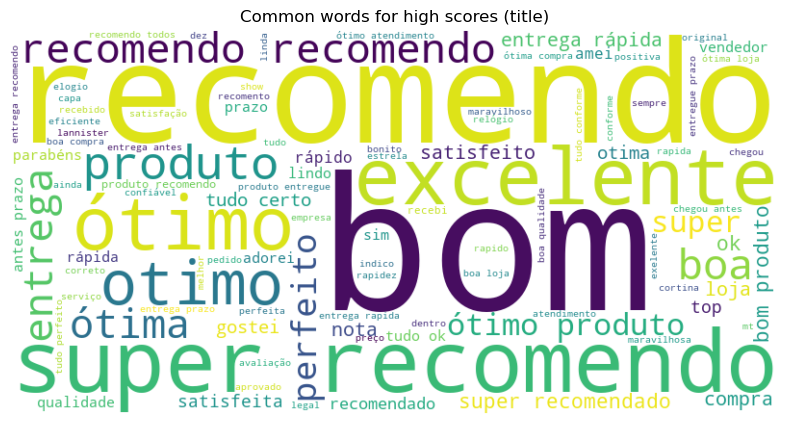

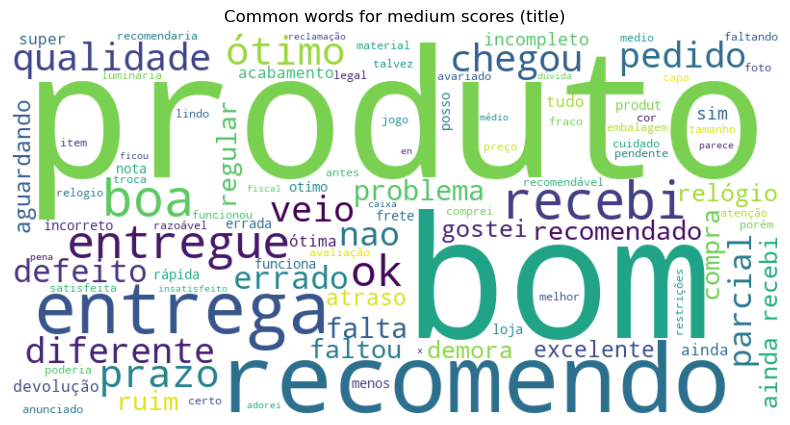

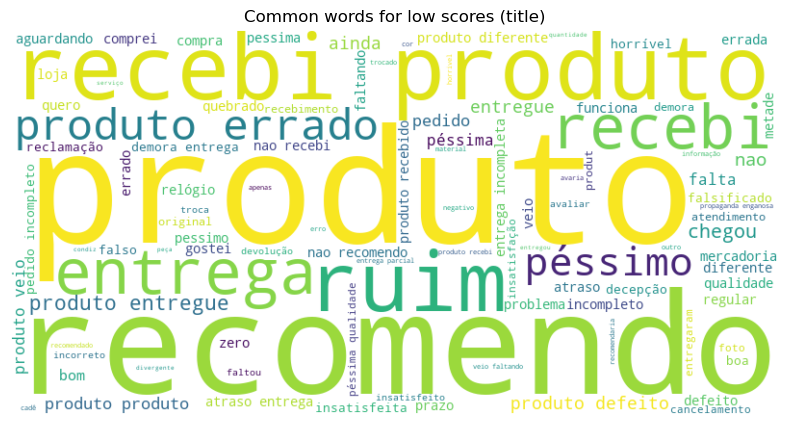

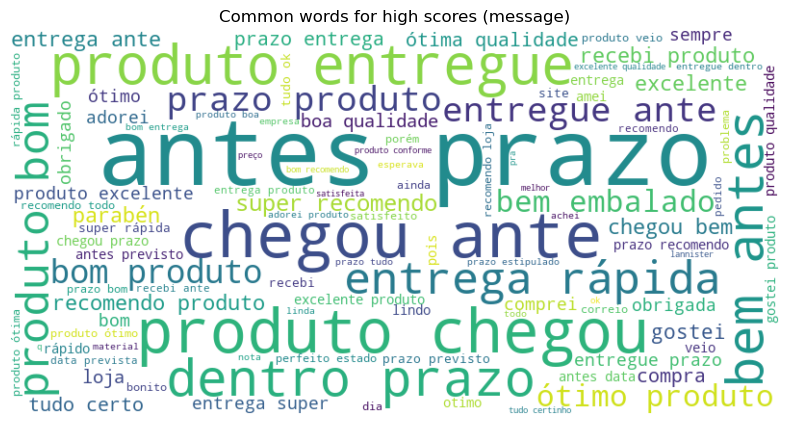

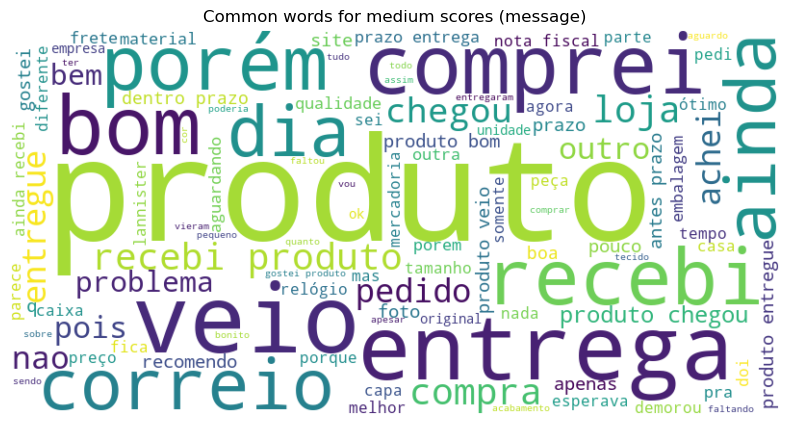

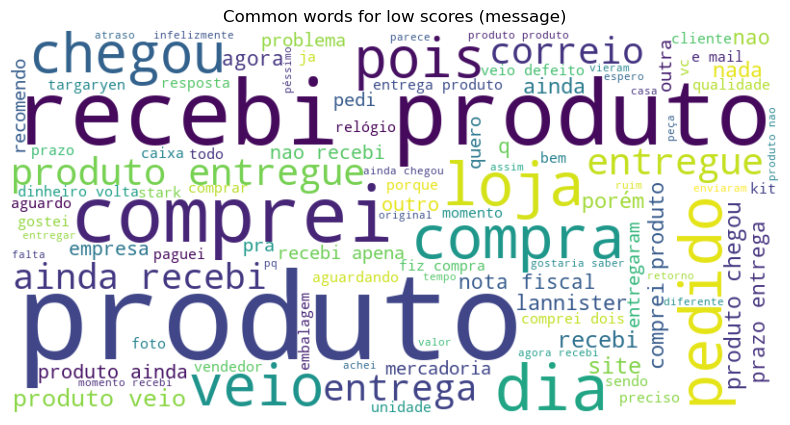

In [32]:
from wordcloud import WordCloud

def analyze_comments(score_values, comment_column):
    # Filter dataframe based on score values
    df_filtered = order_reviews[order_reviews['review_score'].isin(score_values)]

    # Get comments from the specified column
    comments = df_filtered[comment_column].dropna()

    # Convert all comments to lower case, split into words
    words = comments.str.lower().str.split()

    # Flatten the list of lists of words
    words = [word for sublist in words for word in sublist]

    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('portuguese')]

    # Join words back into a string
    words_str = ' '.join(words)

    return words_str

def create_wordcloud(text, title):
    # Create the word cloud
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()
    
    # Save the word cloud to a file
    filename = title.replace(" ", "_") + ".png"
    wordcloud.to_file(filename)

# Get words for different review scores and different columns
words_high_scores_title = analyze_comments([5, 4], 'review_comment_title')
words_medium_scores_title = analyze_comments([3], 'review_comment_title')
words_low_scores_title = analyze_comments([1, 2], 'review_comment_title')

words_high_scores_message = analyze_comments([5, 4], 'review_comment_message')
words_medium_scores_message = analyze_comments([3], 'review_comment_message')
words_low_scores_message = analyze_comments([1, 2], 'review_comment_message')

# Create word clouds
create_wordcloud(words_high_scores_title, "Common words for high scores (title)")
create_wordcloud(words_medium_scores_title, "Common words for medium scores (title)")
create_wordcloud(words_low_scores_title, "Common words for low scores (title)")

create_wordcloud(words_high_scores_message, "Common words for high scores (message)")
create_wordcloud(words_medium_scores_message, "Common words for medium scores (message)")
create_wordcloud(words_low_scores_message, "Common words for low scores (message)")

In the reviews, although there were a lot good keywords, negative keywords were basically about delivery or wrong and defect product.

Some negative keywords include 'entrega', 'errado', 'defeito', and 'péssimo', which means 'delivery', 'wrong', 'defect', and 'terrible' in English.

### 3. Top 4 bad comments among each product
4 bad comments that directly point to the problem: 'delivery', 'wrong', 'defect', and 'terrible' (Original keywords: 'entrega', 'errado', 'defeito', and 'péssimo')

In [33]:
# Merge olist_order_reviews and olist_order_items on 'order_id'
order_reviews_items = pd.merge(order_reviews, order_items, on='order_id', how='right')

# Merge the newly merged dataframe with olist_products_updated on 'product_id'
order_reviews_items_products = pd.merge(order_reviews_items, products_updated, on='product_id', how='right')

In [34]:
# Save the DataFrame to CSV for future reference
order_reviews_items_products.to_csv('order_reviews_items_products.csv', index=False)

#### a. Delivery

'entrega' translates to 'delivery' in English

In [35]:
# Create a mask where either 'review_comment_title' or 'review_comment_message' contains 'entrega'
delivery_mask = (order_reviews_items_products['review_comment_title'].str.contains('entrega', na=False)) | (order_reviews_items_products['review_comment_message'].str.contains('entrega', na=False))

# Apply the mask to the DataFrame
delivery_filtered_order_reviews_items_products = order_reviews_items_products[delivery_mask]

# Group by 'product_category_name', count the number of occurrences, and get the category with the highest count
delivery_highest_counted_category = delivery_filtered_order_reviews_items_products['product_category_name'].value_counts().idxmax()

print(delivery_highest_counted_category)

bed_bath_table


Top category that was complained the most about 'delivery' is "bed_bath_table."

Top 10 Product Categories with "Delivery" Complaint

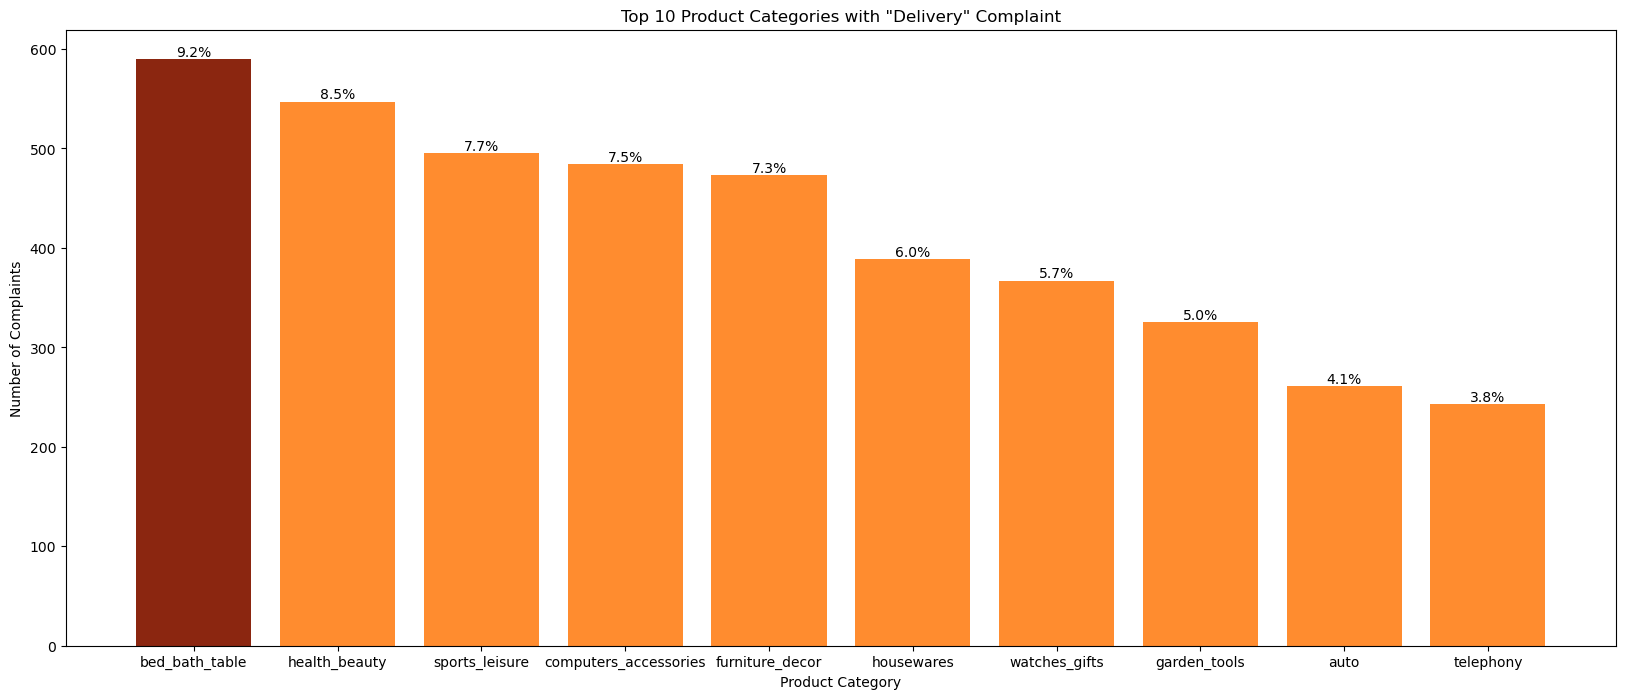

In [36]:
# Count the number of orders for each product category
delivery_category_counts = delivery_filtered_order_reviews_items_products['product_category_name'].value_counts()

# Get the top 10 categories
delivery_top_categories = delivery_category_counts.head(10)

# Calculate the percentages
percentages = 100 * delivery_top_categories / delivery_category_counts.sum()

# Create a color list: 'darkblue' if the value is the max value, 'skyblue' otherwise
colors = ['#8b2610' if x == max(delivery_top_categories) else '#ff8c2f' for x in delivery_top_categories]

# Create a new figure
fig, ax = plt.subplots(figsize=(20,8))

# Create the bar chart
bars = ax.bar(delivery_top_categories.index, delivery_top_categories, color=colors)

# Set the title and labels
ax.set_title('Top 10 Product Categories with "Delivery" Complaint')
ax.set_xlabel('Product Category')
ax.set_ylabel('Number of Complaints')

# Rotate x-axis labels for better readability
# plt.xticks(rotation=90)

# Add percentages on top of each bar
for bar, percentage in zip(bars, percentages):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{percentage:.1f}%', ha='center', va='bottom')

plt.savefig('Top 10 Product Categories with "Delivery" Complaint.png')
    
# Show the plot
plt.show()

#### b. Wrong

'errado' translates to 'wrong' in English

In [37]:
# Create a mask where either 'review_comment_title' or 'review_comment_message' contains 'errado'
wrong_mask = (order_reviews_items_products['review_comment_title'].str.contains('errado', na=False)) | (order_reviews_items_products['review_comment_message'].str.contains('errado', na=False))

# Apply the mask to the DataFrame
wrong_filtered_order_reviews_items_products = order_reviews_items_products[wrong_mask]

# Group by 'product_category_name', count the number of occurrences, and get the category with the highest count
wrong_highest_counted_category = wrong_filtered_order_reviews_items_products['product_category_name'].value_counts().idxmax()

print(wrong_highest_counted_category)

health_beauty


Top category that was complained the most about 'wrong' is "health_beauty."

Top 10 Product Categories with "Wrong" Complaint

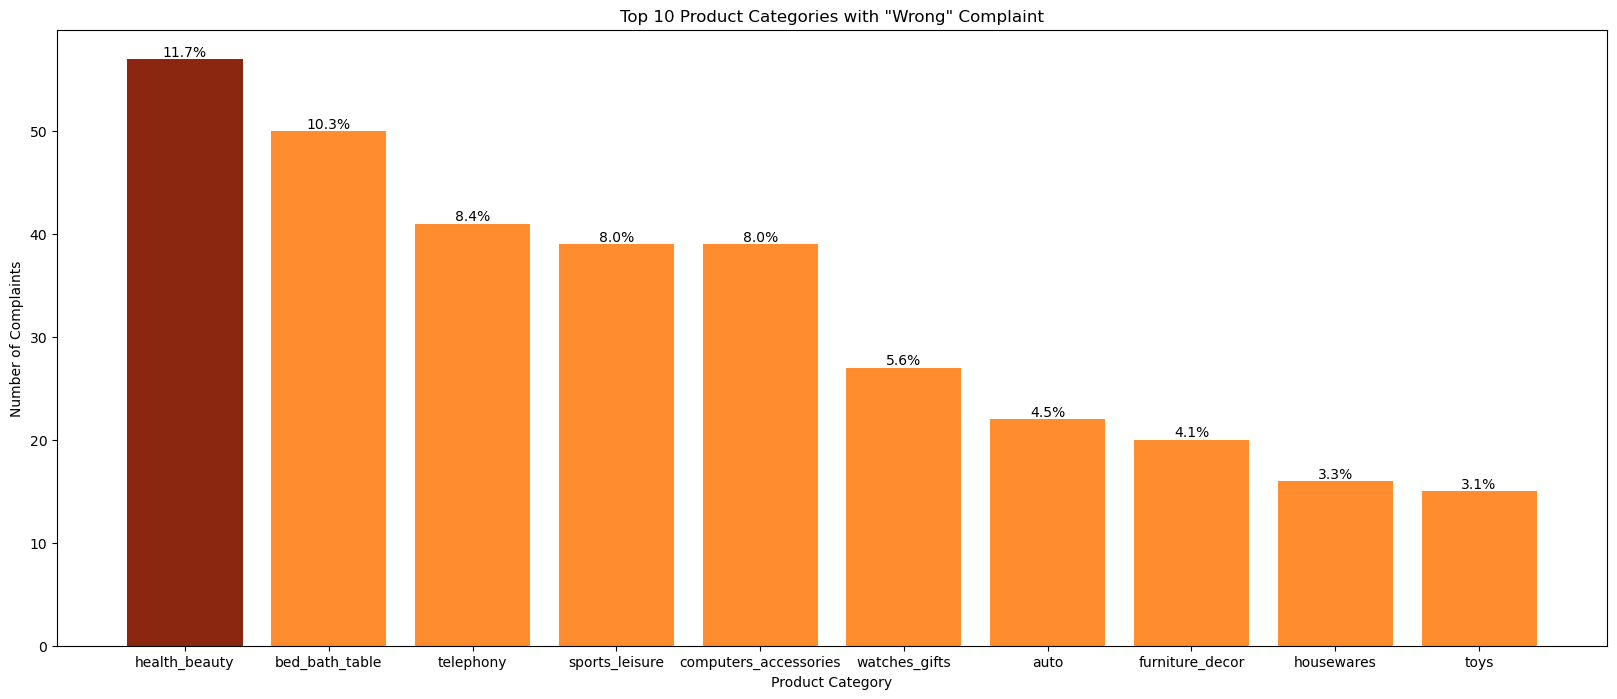

In [38]:
# Count the number of orders for each product category
wrong_category_counts = wrong_filtered_order_reviews_items_products['product_category_name'].value_counts()

# Get the top 10 categories
wrong_top_categories = wrong_category_counts.head(10)

# Calculate the percentages
percentages = 100 * wrong_top_categories / wrong_category_counts.sum()

# Create a color list: 'darkblue' if the value is the max value, 'skyblue' otherwise
colors = ['#8b2610' if x == max(wrong_top_categories) else '#ff8c2f' for x in wrong_top_categories]

# Create a new figure
fig, ax = plt.subplots(figsize=(20,8))

# Create the bar chart
bars = ax.bar(wrong_top_categories.index, wrong_top_categories, color=colors)

# Set the title and labels
ax.set_title('Top 10 Product Categories with "Wrong" Complaint')
ax.set_xlabel('Product Category')
ax.set_ylabel('Number of Complaints')

# Rotate x-axis labels for better readability
# plt.xticks(rotation=90)

# Add percentages on top of each bar
for bar, percentage in zip(bars, percentages):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{percentage:.1f}%', ha='center', va='bottom')

plt.savefig('Top 10 Product Categories with "Wrong" Complaint.png')
    
# Show the plot
plt.show()

#### c. Defect

'defeito' translates to 'defect' in English

In [39]:
# Create a mask where either 'review_comment_title' or 'review_comment_message' contains 'defeito'
defect_mask = (order_reviews_items_products['review_comment_title'].str.contains('defeito', na=False)) | (order_reviews_items_products['review_comment_message'].str.contains('defeito', na=False))

# Apply the mask to the DataFrame
defect_filtered_order_reviews_items_products = order_reviews_items_products[defect_mask]

# Group by 'product_category_name', count the number of occurrences, and get the category with the highest count
defect_highest_counted_category = defect_filtered_order_reviews_items_products['product_category_name'].value_counts().idxmax()

print(defect_highest_counted_category)

computers_accessories


Top category that was complained the most about 'defect' is "computers_accessories."

Top 10 Product Categories with "Defect" Complaint

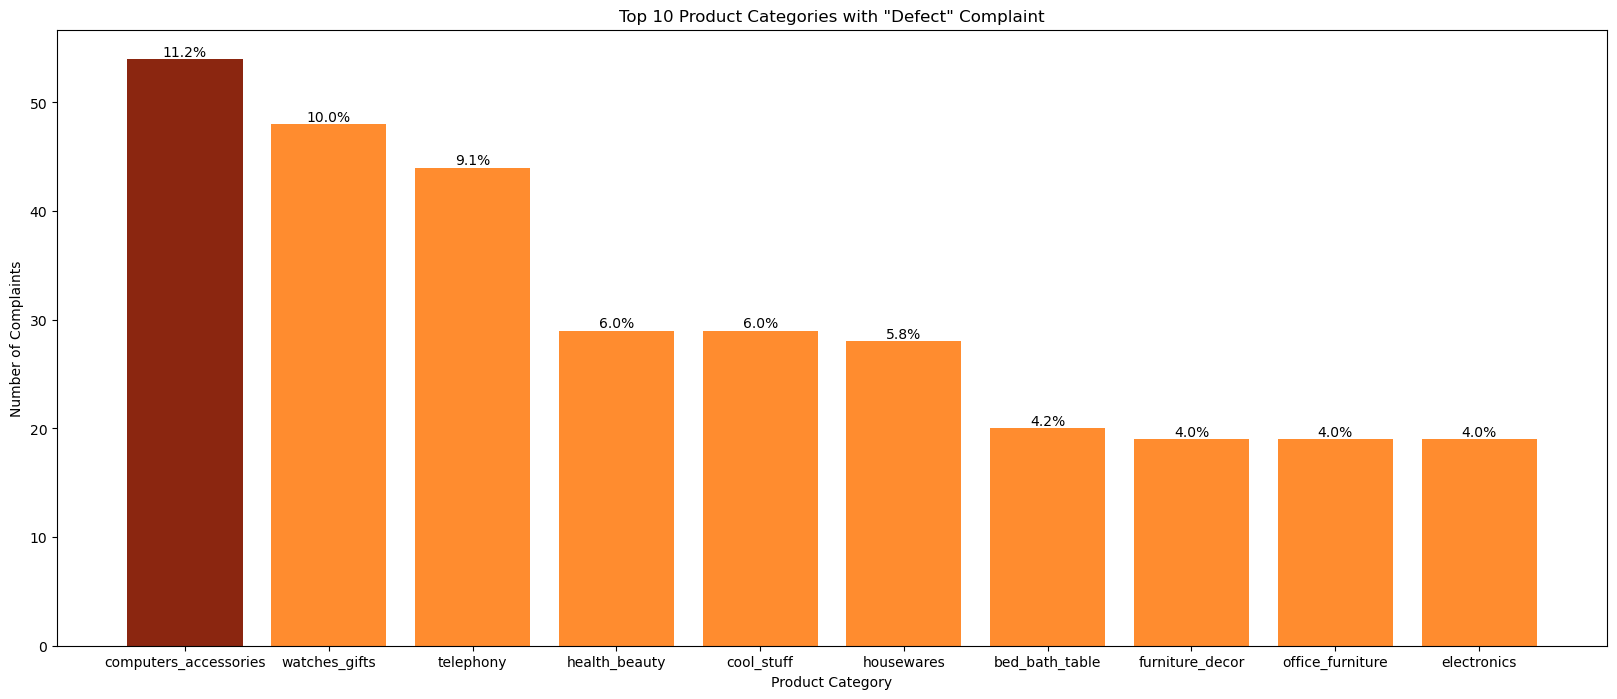

In [40]:
# Count the number of orders for each product category
defect_category_counts = defect_filtered_order_reviews_items_products['product_category_name'].value_counts()

# Get the top 10 categories
defect_top_categories = defect_category_counts.head(10)

# Calculate the percentages
percentages = 100 * defect_top_categories / defect_category_counts.sum()

# Create a color list: 'darkblue' if the value is the max value, 'skyblue' otherwise
colors = ['#8b2610' if x == max(defect_top_categories) else '#ff8c2f' for x in defect_top_categories]

# Create a new figure
fig, ax = plt.subplots(figsize=(20,8))

# Create the bar chart
bars = ax.bar(defect_top_categories.index, defect_top_categories, color=colors)

# Set the title and labels
ax.set_title('Top 10 Product Categories with "Defect" Complaint')
ax.set_xlabel('Product Category')
ax.set_ylabel('Number of Complaints')

# Rotate x-axis labels for better readability
# plt.xticks(rotation=90)

# Add percentages on top of each bar
for bar, percentage in zip(bars, percentages):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{percentage:.1f}%', ha='center', va='bottom')

plt.savefig('Top 10 Product Categories with "Defect" Complaint.png')
    
# Show the plot
plt.show()

#### d. Terrible

'péssimo' translates to 'terrible' in English

In [41]:
# Create a mask where either 'review_comment_title' or 'review_comment_message' contains 'péssimo'
terrible_mask = (order_reviews_items_products['review_comment_title'].str.contains('péssimo', na=False)) | (order_reviews_items_products['review_comment_message'].str.contains('péssimo', na=False))

# Apply the mask to the DataFrame
terrible_filtered_order_reviews_items_products = order_reviews_items_products[terrible_mask]

# Group by 'product_category_name', count the number of occurrences, and get the category with the highest count
terrible_highest_counted_category = terrible_filtered_order_reviews_items_products['product_category_name'].value_counts().idxmax()

print(terrible_highest_counted_category)

furniture_decor


Top category that was complained the most about 'terrible' is "furniture_decor."

Top 10 Product Categories with "Terrible" Complaint

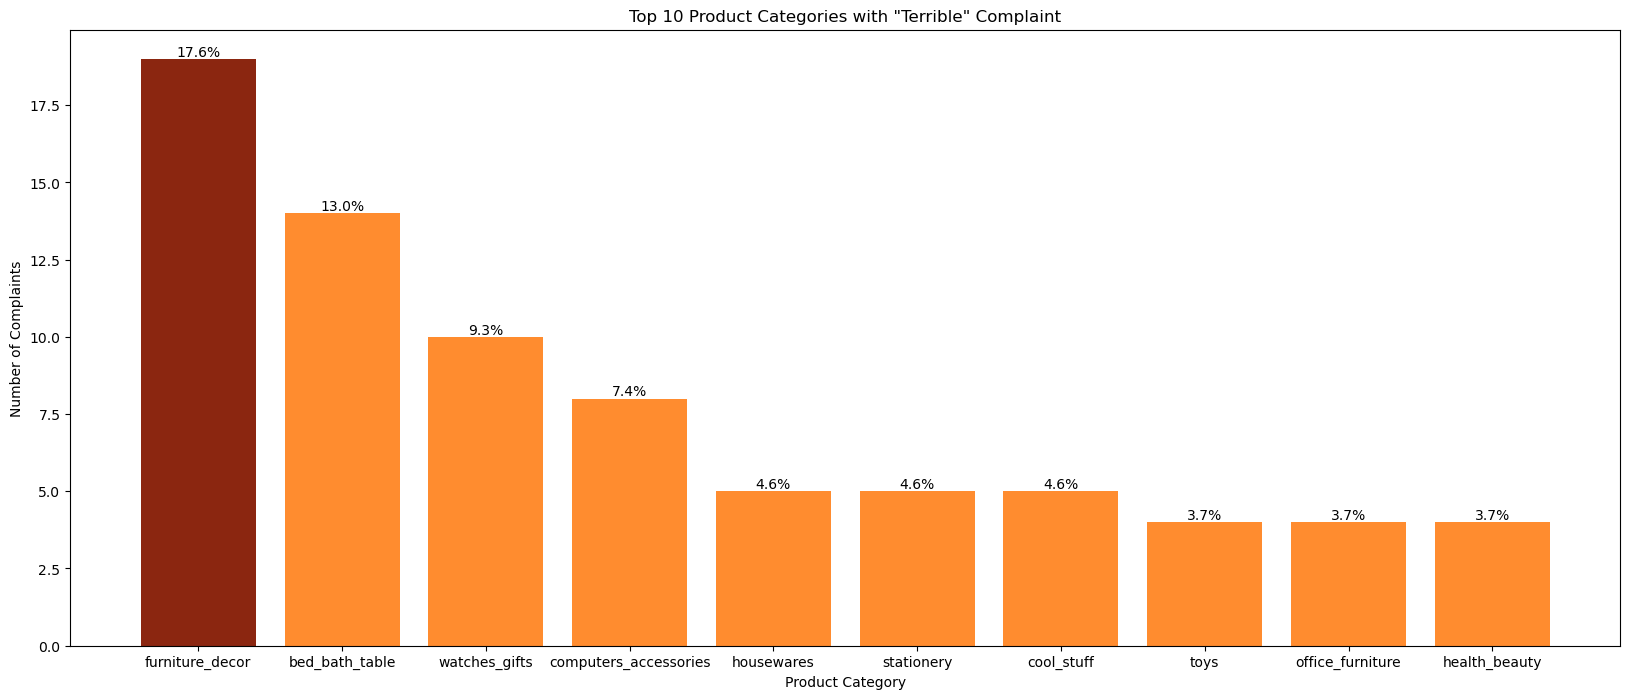

In [42]:
# Count the number of orders for each product category
terrible_category_counts = terrible_filtered_order_reviews_items_products['product_category_name'].value_counts()

# Get the top 10 categories
terrible_top_categories = terrible_category_counts.head(10)

# Calculate the percentages
percentages = 100 * terrible_top_categories / terrible_category_counts.sum()

# Create a color list: 'darkblue' if the value is the max value, 'skyblue' otherwise
colors = ['#8b2610' if x == max(terrible_top_categories) else '#ff8c2f' for x in terrible_top_categories]

# Create a new figure
fig, ax = plt.subplots(figsize=(20,8))

# Create the bar chart
bars = ax.bar(terrible_top_categories.index, terrible_top_categories, color=colors)

# Set the title and labels
ax.set_title('Top 10 Product Categories with "Terrible" Complaint')
ax.set_xlabel('Product Category')
ax.set_ylabel('Number of Complaints')

# Rotate x-axis labels for better readability
# plt.xticks(rotation=90)

# Add percentages on top of each bar
for bar, percentage in zip(bars, percentages):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{percentage:.1f}%', ha='center', va='bottom')

plt.savefig('Top 10 Product Categories with "Terrible" Complaint.png')
    
# Show the plot
plt.show()

## Geolocation Analysis

In this section, we are going to look at the following things:

1. Geolocation by Customer Payment Value
2. Geolocation by Sellers
3. Geolocation by Freight Value
4. Geolocation by Product Category

The datasets we are using include: Geolocation, Orders, Customers, Sellers, Products

In [43]:
# Clean and refine geolocation data

In [44]:
geolocation = geolocation.rename(columns={"geolocation_zip_code_prefix": "customer_zip_code_prefix"})

In [45]:
geolocation

customer_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                            1037       -23.545621       -46.639292   
1                            1046       -23.546081       -46.644820   
2                            1046       -23.546129       -46.642951   
3                            1041       -23.544392       -46.639499   
4                            1035       -23.541578       -46.641607   
...                           ...              ...              ...   
1000158                     99950       -28.068639       -52.010705   
1000159                     99900       -27.877125       -52.224882   
1000160                     99950       -28.071855       -52.014716   
1000161                     99980       -28.388932       -51.846871   
1000162                     99950       -28.070104       -52.018658   

        geolocation_city geolocation_state  
0              sao paulo                SP  
1              sao paulo                SP  
2              sao paulo                SP  
3              sao paulo                SP  
4              sao paulo                SP  
...                  ...               ...  
1000158         tapejara                RS  
1000159   getulio vargas                RS  
1000160         tapejara                RS  
1000161  david canabarro                RS  
1000162         tapejara                RS  

[1000163 rows x 5 columns]

In [46]:
geolocation = geolocation.groupby('customer_zip_code_prefix')[['geolocation_lat', 'geolocation_lng']].mean()

In [47]:
geolocation = geolocation.reset_index()

In [48]:
# mean geolocation
geolocation

customer_zip_code_prefix  geolocation_lat  geolocation_lng
0                          1001       -23.550190       -46.634024
1                          1002       -23.548146       -46.634979
2                          1003       -23.548994       -46.635731
3                          1004       -23.549799       -46.634757
4                          1005       -23.549456       -46.636733
...                         ...              ...              ...
19010                     99960       -27.953722       -52.025511
19011                     99965       -28.183372       -52.039850
19012                     99970       -28.343766       -51.874689
19013                     99980       -28.389129       -51.843836
19014                     99990       -28.329595       -51.769362

[19015 rows x 3 columns]

In [49]:
customers_orders = pd.merge(filtered_orders, customers)
customers_orders

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99416  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99417  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99418  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99419  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99420  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp   order_approved_at  \
0        delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   
...            ...                      ...                 ...   
99416    delivered      2017-03-09 09:54:05 2017-03-09 09:54:05   
99417    delivered      2018-02-06 12:58:58 2018-02-06 13:10:37   
99418    delivered      2017-08-27 14:46:43 2017-08-27 15:04:16   
99419    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
99420    delivered      2018-03-08 20:57:30 2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99416          2017-03-10 11:18:03           2017-03-17 15:08:01   
99417          2018-02-07 23:22:42           2018-02-28 17:37:56   
99418          2017-08-28 20:52:26           2017-09-21 11:24:17   
99419          2018-01-12 15:35:03           2018-01-25 23:32:54   
99420          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date year_month  year  day_of_week  \
0                        2017-10-18    2017-10  2017            0   
1                        2018-08-13    2018-07  2018            1   
2                        2018-09-04    2018-08  2018            2   
3                        2017-12-15    2017-11  2017            5   
4                        2018-02-26    2018-02  2018            1   
...                             ...        ...   ...          ...   
99416                    2017-03-28    2017-03  2017            3   
99417                    2018-03-02    2018-02  2018            1   
99418                    2017-09-27    2017-08  2017            6   
99419                    2018-02-15    2018-01  2018            0   
99420                    2018-04-03    2018-03  2018            3   

       hour_of_day time_period                customer_unique_id  \
0               10     Morning  7c396fd4830fd04220f754e42b4e5bff   
1               20       Night  af07308b275d755c9edb36a90c618231   
2                8     Morning  3a653a41f6f9fc3d2a113cf8398680e8   
3               19       Night  7c142cf63193a1473d2e66489a9ae977   
4               21       Night  72632f0f9dd73dfee390c9b22eb56dd6   
...            ...         ...                               ...   
99416            9     Morning  6359f309b166b0196dbf7ad2ac62bb5a   
99417           12   Afternoon  da62f9e57a76d978d02ab5362c509660   
99418           14   Afternoon  737520a9aad

In [50]:
customers_orders_payments = pd.merge(customers_orders, order_payments)

In [51]:
# Sum 'payment_value' for each 'customer_id'
payment_sum = customers_orders_payments.groupby('customer_id')['payment_value'].sum().reset_index()
payment_sum.rename(columns={'payment_value': 'total_payment_value'}, inplace=True)

In [52]:
# Merge the sum back with the original DataFrame to add 'total_payment_value' column
# Ensure to merge on 'customer_id' to match each customer's total payment to their orders
pay_sum = pd.merge(customers_orders_payments, payment_sum, on='customer_id')

In [53]:
pay_sum_geolocation = pd.merge(pay_sum, geolocation)

In [54]:
pay_sum_geolocation

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       70b35acffdf851e782ebf6fbc35eb620  8e8ee9b08afb49b080d193f98b0505af   
4       69923a4e07ce446644394df37a710286  31f31efcb333fcbad2b1371c8cf0fa84   
...                                  ...                               ...   
103574  87334ea6311529ce3e36b18350d2d4b3  02f29ee4753e69018942c30e71c04cfd   
103575  5bd233924f0b9c52492bd5a92e5ab2d3  d7475a536385854da614094f0bf12275   
103576  cfa78b997e329a5295b4ee6972c02979  a2f7428f0cafbc8e59f20e1444b67315   
103577  880675dff2150932f1601e1c07eadeeb  47cd45a6ac7b9fb16537df2ccffeb5ac   
103578  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   

       order_status order_purchase_timestamp   order_approved_at  \
0         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3         delivered      2018-03-22 17:23:21 2018-03-22 18:05:36   
4         delivered      2017-09-04 11:26:38 2017-09-04 11:43:25   
...             ...                      ...                 ...   
103574    delivered      2018-01-20 18:39:14 2018-01-20 19:09:35   
103575    delivered      2018-05-30 13:23:37 2018-05-31 03:15:27   
103576    delivered      2017-12-20 09:52:41 2017-12-20 10:09:52   
103577    delivered      2017-02-23 09:05:12 2017-02-23 09:15:11   
103578    delivered      2017-08-27 14:46:43 2017-08-27 15:04:16   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-10-04 19:55:00           2017-10-10 21:25:13   
2               2017-10-04 19:55:00           2017-10-10 21:25:13   
3               2018-03-23 18:03:03           2018-03-25 17:22:41   
4               2017-09-04 21:22:15           2017-09-05 19:20:20   
...                             ...                           ...   
103574          2018-01-23 19:29:09           2018-01-31 18:38:38   
103575          2018-06-04 06:16:00           2018-06-14 22:49:24   
103576          2017-12-20 20:25:25           2018-01-26 15:45:14   
103577          2017-03-01 10:22:52           2017-03-06 11:08:08   
103578          2017-08-28 20:52:26           2017-09-21 11:24:17   

       order_estimated_delivery_date year_month  year  day_of_week  \
0                         2017-10-18    2017-10  2017            0   
1                         2017-10-18    2017-10  2017            0   
2                         2017-10-18    2017-10  2017            0   
3                         2018-04-04    2018-03  2018            3   
4                         2017-09-15    2017-09  2017            0   
...                              ...        ...   ...          ...   
103574                    2018-02-20    2018-01  2018            5   
103575                    2018-07-13    2018-05  2018            2   
103576                    2018-01-18    2017-12  2017            2   
103577                    2017-03-22    2017-02  2017            3   
103578                    2017-09-27    2017-08  2017            6   

        hour_of_day time_period                customer_unique_id  \
0                10     Morning  7c396fd4830fd04220f754e42b4e5bff   
1                10     Morning  7c396fd4830fd04220f754e42b4e5bff   
2                10     Morning  7c396fd4830fd04220f754e42b4e5bff   
3                17   Afternoon  8a4002923e801e3120a11070fd31c9e2   
4                11     Morning  7c396fd4830fd04220f754e42b4e5bff   
...             ...         ...                               ...   
103574           18       Night  f86370dc13be4e8958cb036b628afbcc   
103575           13   Afternoon  17e3c70fc02567ec2d3831f

### 1. Geolocation by Customer Payment Value

Since there's too many customer record, I used groupby to group the customer under the same zipcode to see their payment value on the map.

In [55]:
pay_sum_geolocation_new = pay_sum_geolocation.groupby(['customer_zip_code_prefix','geolocation_lat','geolocation_lng'], as_index=False)['payment_value'].sum()
pay_sum_geolocation_new

customer_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                          1003       -23.548994       -46.635731   
1                          1004       -23.549799       -46.634757   
2                          1005       -23.549456       -46.636733   
3                          1006       -23.550102       -46.636137   
4                          1007       -23.550046       -46.637251   
...                         ...              ...              ...   
14832                     99960       -27.953722       -52.025511   
14833                     99965       -28.183372       -52.039850   
14834                     99970       -28.343766       -51.874689   
14835                     99980       -28.389129       -51.843836   
14836                     99990       -28.329595       -51.769362   

       payment_value  
0              98.97  
1             198.11  
2             570.72  
3             868.05  
4             505.55  
...              ...  
14832         194.63  
14833         227.59  
14834         252.74  
14835         222.77  
14836         270.45  

[14837 rows x 4 columns]

In [56]:
pip install plotly==5.8.0

Note: you may need to restart the kernel to use updated packages.


Let's use the heatmap to plot customer's payment value on differnt geolocation:
- High payment value are mostly located around the coast
- Customers in Sao Paulo got the highest payment value

In [57]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [58]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

In [117]:
# Heatmap with latitude/longitude and values

fig = px.density_mapbox(pay_sum_geolocation_new, 
                        lat = 'geolocation_lat', 
                        lon = 'geolocation_lng', 
                        z = 'payment_value', 
                        radius = 8,
                        center = dict(lat=-23.47, lon=-46.64), 
                        zoom = 5, 
                        mapbox_style = 'open-street-map',
                        color_continuous_scale = ['#640000', '#8b2610', '#b2471b', '#d96825', '#ff8c2f'],
                        title = "Payment Value Distribution across Geolocations")

# Customizing hover data
# Assuming 'pay_sum_geolocation_new' includes columns like 'customer_id' or others for more context
fig.update_traces(hovertemplate="<b>Lat:</b> %{lat}<br><b>Lon:</b> %{lon}<br><b>Payment Value:</b> %{z}<br>")

fig.show()

SP (São Paulo) is the state with the highest payment value distribution.

In [60]:
# Save the figure to a file and html
pio.write_image(fig, 'Payment Value Distribution across Geolocations.png')
fig.write_html('Payment Value Distribution across Geolocations.html')

### 2. Geolocation by Seller

In [61]:
sellers = sellers.rename(columns={"seller_zip_code_prefix": "customer_zip_code_prefix"})

In [62]:
sellers_geo = pd.merge(sellers, geolocation)

In [63]:
sellers_geo

seller_id  customer_zip_code_prefix  \
0     3442f8959a84dea7ee197c632cb2df15                     13023   
1     e0eabded302882513ced4ea3eb0c7059                     13023   
2     d1b65fc7debc3361ea86b5f14c68d2e2                     13844   
3     ce3ad9de960102d0677a81f5d0bb7b2d                     20031   
4     1d2732ef8321502ee8488e8bed1ab8cd                     20031   
...                                ...                       ...   
3083  f1fdf2d13186575751aa25876536d85c                      5314   
3084  98dddbc4601dd4443ca174359b237166                     87111   
3085  74871d19219c7d518d0090283e03c137                      4650   
3086  e603cf3fec55f8697c9059638d6c8eb5                     96080   
3087  9e25199f6ef7e7c347120ff175652c3b                     12051   

         seller_city seller_state  geolocation_lat  geolocation_lng  
0           campinas           SP       -22.893848       -47.061337  
1           campinas           SP       -22.893848       -47.061337  
2         mogi guacu           SP       -22.383437       -46.947927  
3     rio de janeiro           RJ       -22.909572       -43.177703  
4     rio de janeiro           RJ       -22.909572       -43.177703  
...              ...          ...              ...              ...  
3083       sao paulo           SP       -23.530647       -46.736453  
3084         sarandi           PR       -23.448041       -51.869960  
3085       sao paulo           SP       -23.657851       -46.676925  
3086         pelotas           RS       -31.751072       -52.323202  
3087         taubate           SP       -23.012009       -45.585652  

[3088 rows x 6 columns]

In [64]:
#seller by region
sellers_geo['seller_state'].value_counts(dropna=False)

seller_state
SP    1847
PR     348
MG     243
SC     190
RJ     171
RS     128
GO      40
DF      28
ES      23
BA      19
CE      13
PE       9
PB       6
RN       5
MS       5
MT       4
RO       2
SE       2
AC       1
PI       1
PA       1
MA       1
AM       1
Name: count, dtype: int64

SP (São Paulo) is also the state where most sellers locate in. Sellers are mostly in SP, PR and MG state.Sellers are mostly in SP, PR and MG state.

### 3. Geolocation by Freight Value

In [65]:
# Merge data
pay_sum_geolocation_orders = pd.merge(pay_sum_geolocation, filtered_orders)

I want to see how much freight did customer pay under their total payment value. Here I created a new column which is using the value of freight value divided by the payment value.

In [66]:
#freight value ratio
freight_value_ratio = pd.merge(order_items, pay_sum_geolocation_orders)

In [67]:
freight_value_ratio['freight ratio'] = freight_value_ratio['freight_value']/freight_value_ratio['payment_value']

In [68]:
freight_value_ratio

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
117283  fffc94f6ce00a00581880bf54a75a037              1   
117284  fffcd46ef2263f404302a634eb57f7eb              1   
117285  fffce4705a9662cd70adb13d4a31832d              1   
117286  fffe18544ffabc95dfada21779c9644f              1   
117287  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
117283  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
117284  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
117285  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
117286  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
117287  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date   price  freight_value  \
0       2017-09-19 09:45:35   58.90          13.29   
1       2017-05-03 11:05:13  239.90          19.93   
2       2018-01-18 14:48:30  199.00          17.87   
3       2018-08-15 10:10:18   12.99          12.79   
4       2017-02-13 13:57:51  199.90          18.14   
...                     ...     ...            ...   
117283  2018-05-02 04:11:01  299.99          43.41   
117284  2018-07-20 04:31:48  350.00          36.53   
117285  2017-10-30 17:14:25   99.90          16.95   
117286  2017-08-21 00:04:32   55.99           8.72   
117287  2018-06-12 17:10:13   43.00          12.79   

                             customer_id order_status  \
0       3ce436f183e68e07877b285a838db11a    delivered   
1       f6dd3ec061db4e3987629fe6b26e5cce    delivered   
2       6489ae5e4333f3693df5ad4372dab6d3    delivered   
3       d4eb9395c8c0431ee92fce09860c5a06    delivered   
4       58dbd0b2d70206bf40e62cd34e84d795    delivered   
...                                  ...          ...   
117283  b51593916b4b8e0d6f66f2ae24f2673d    delivered   
117284  84c5d4fbaf120aae381fad077416eaa0    delivered   
117285  29309aa813182aaddc9b259e31b870e6    delivered   
117286  b5e6afd5a41800fdf401e0272ca74655    delivered   
117287  96d649da0cc4ff33bb408b199d4c7dcf    delivered   

       order_purchase_timestamp   order_approved_at  \
0           2017-09-13 08:59:02 2017-09-13 09:45:35   
1           2017-04-26 10:53:06 2017-04-26 11:05:13   
2           2018-01-14 14:33:31 2018-01-14 14:48:30   
3           2018-08-08 10:00:35 2018-08-08 10:10:18   
4           2017-02-04 13:57:51 2017-02-04 14:10:13   
...                         ...                 ...   
117283      2018-04-23 13:57:06 2018-04-25 04:11:01   
117284      2018-07-14 10:26:46 2018-07-17 04:31:48   
117285      2017-10-23 17:07:56 2017-10-24 17:14:25   
117286      2017-08-14 23:02:59 2017-08-15 00:04:32   
117287      2018-06-09 17:00:18 2018-06-09 17:10:13   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-09-19 18:34:16           2017-09-20 23:43:48   
1               2017-05-04 14:35:00           2017-05-12 16:04:24   
2               2018-01-16 12:36:48           2018-01-22 13:19:16   
3               2018-08-10 13:28:00           2018-08-14 13:32:39   
4               2017-02-16 09:46:09           

Again, I groupped by the zipcode and put the freight value ratio on the heatmap to see the geolocation.

- The customer living at the coast got the highest freight ratio

In [69]:
freight_value_ratio_new = freight_value_ratio.groupby(['customer_zip_code_prefix','geolocation_lat','geolocation_lng'], as_index=False)['freight ratio'].mean()

In [70]:
freight_value_ratio_new

customer_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                          1003       -23.548994       -46.635731   
1                          1004       -23.549799       -46.634757   
2                          1005       -23.549456       -46.636733   
3                          1006       -23.550102       -46.636137   
4                          1007       -23.550046       -46.637251   
...                         ...              ...              ...   
14815                     99960       -27.953722       -52.025511   
14816                     99965       -28.183372       -52.039850   
14817                     99970       -28.343766       -51.874689   
14818                     99980       -28.389129       -51.843836   
14819                     99990       -28.329595       -51.769362   

       freight ratio  
0           0.090735  
1           0.098433  
2           0.175777  
3           0.044984  
4           0.126187  
...              ...  
14815       0.117419  
14816       0.265740  
14817       0.093931  
14818       0.157151  
14819       0.131078  

[14820 rows x 4 columns]

In [71]:
# Summary statistics
print(freight_value_ratio_new['freight ratio'].describe())

count    14815.000000
mean         0.346946
std          3.709911
min          0.000000
25%          0.148270
50%          0.194651
75%          0.261993
max        302.394265
Name: freight ratio, dtype: float64


Define outliers as ratio > 1. (It means that frieight value equal to payment value would be the outliers)
There are a few outliers.

In [72]:
# Define outliers as any "freight ratio" over 1
outliers_over_1 = freight_value_ratio_new[freight_value_ratio_new['freight ratio'] > 1]

# Count the number of these outliers
num_outliers_over_1 = outliers_over_1.shape[0]

print(f"Number of 'freight ratio' values over 1: {num_outliers_over_1}")
print(f"Percentage of 'freight ratio' values over 1: {100 * num_outliers_over_1 / len(freight_value_ratio_new):.2f}%")

Number of 'freight ratio' values over 1: 269
Percentage of 'freight ratio' values over 1: 1.82%


Since those outliers means that people would pay for high freight no matter how much the freight is, so would want to show heatmap that those outliers also mean 1.

In [118]:
# Heatmap with latitude/longitude and freight ratio

# Cap the "freight ratio" at 1 for visualization purposes
freight_value_ratio_new['capped_freight_ratio'] = freight_value_ratio_new['freight ratio'].clip(upper=1)

# Create the heatmap
freight = px.density_mapbox(freight_value_ratio_new,
                            lat='geolocation_lat', lon='geolocation_lng',
                            z='capped_freight_ratio',  # Use the capped "freight ratio"
                            radius=8,
                            center=dict(lat=-23.47, lon=-46.64),
                            zoom=5,
                            mapbox_style='open-street-map',
                            color_continuous_scale=['#640000', '#8b2610', '#b2471b', '#d96825', '#ff8c2f'],
                            title="Freight Ratio Distribution across Geolocations")

# Customizing hover data - keeping in mind the limitation
freight.update_traces(hovertemplate="<b>Lat:</b> %{lat}<br><b>Lon:</b> %{lon}<br><b>Freight Ratio:</b> %{z}<br>")

# Show the map
freight.show()

About 1.82% of all orders did not care about the freight, and SP (São Paulo) is also the state that has the most highest frieght ratio.

In [120]:
# Save the figure to a file and html
pio.write_image(freight, 'Freight Ratio Distribution across Geolocations.png')
freight.write_html('Freight Ratio Distribution across Geolocations.html')

### 4. Geolocation by Product Category

In [75]:
#merge with geolocation
products_geo = pd.merge(products_updated, freight_value_ratio)

In [76]:
category_geo = products_geo.groupby(['customer_state'])['product_category_name'].value_counts()
category_geo

customer_state  product_category_name 
AC              furniture_decor           12
                computers_accessories      9
                sports_leisure             9
                health_beauty              7
                watches_gifts              5
                                          ..
TO              musical_instruments        1
                fashion_shoes              1
                audio                      1
                computers                  1
                books_general_interest     1
Name: count, Length: 1393, dtype: int64

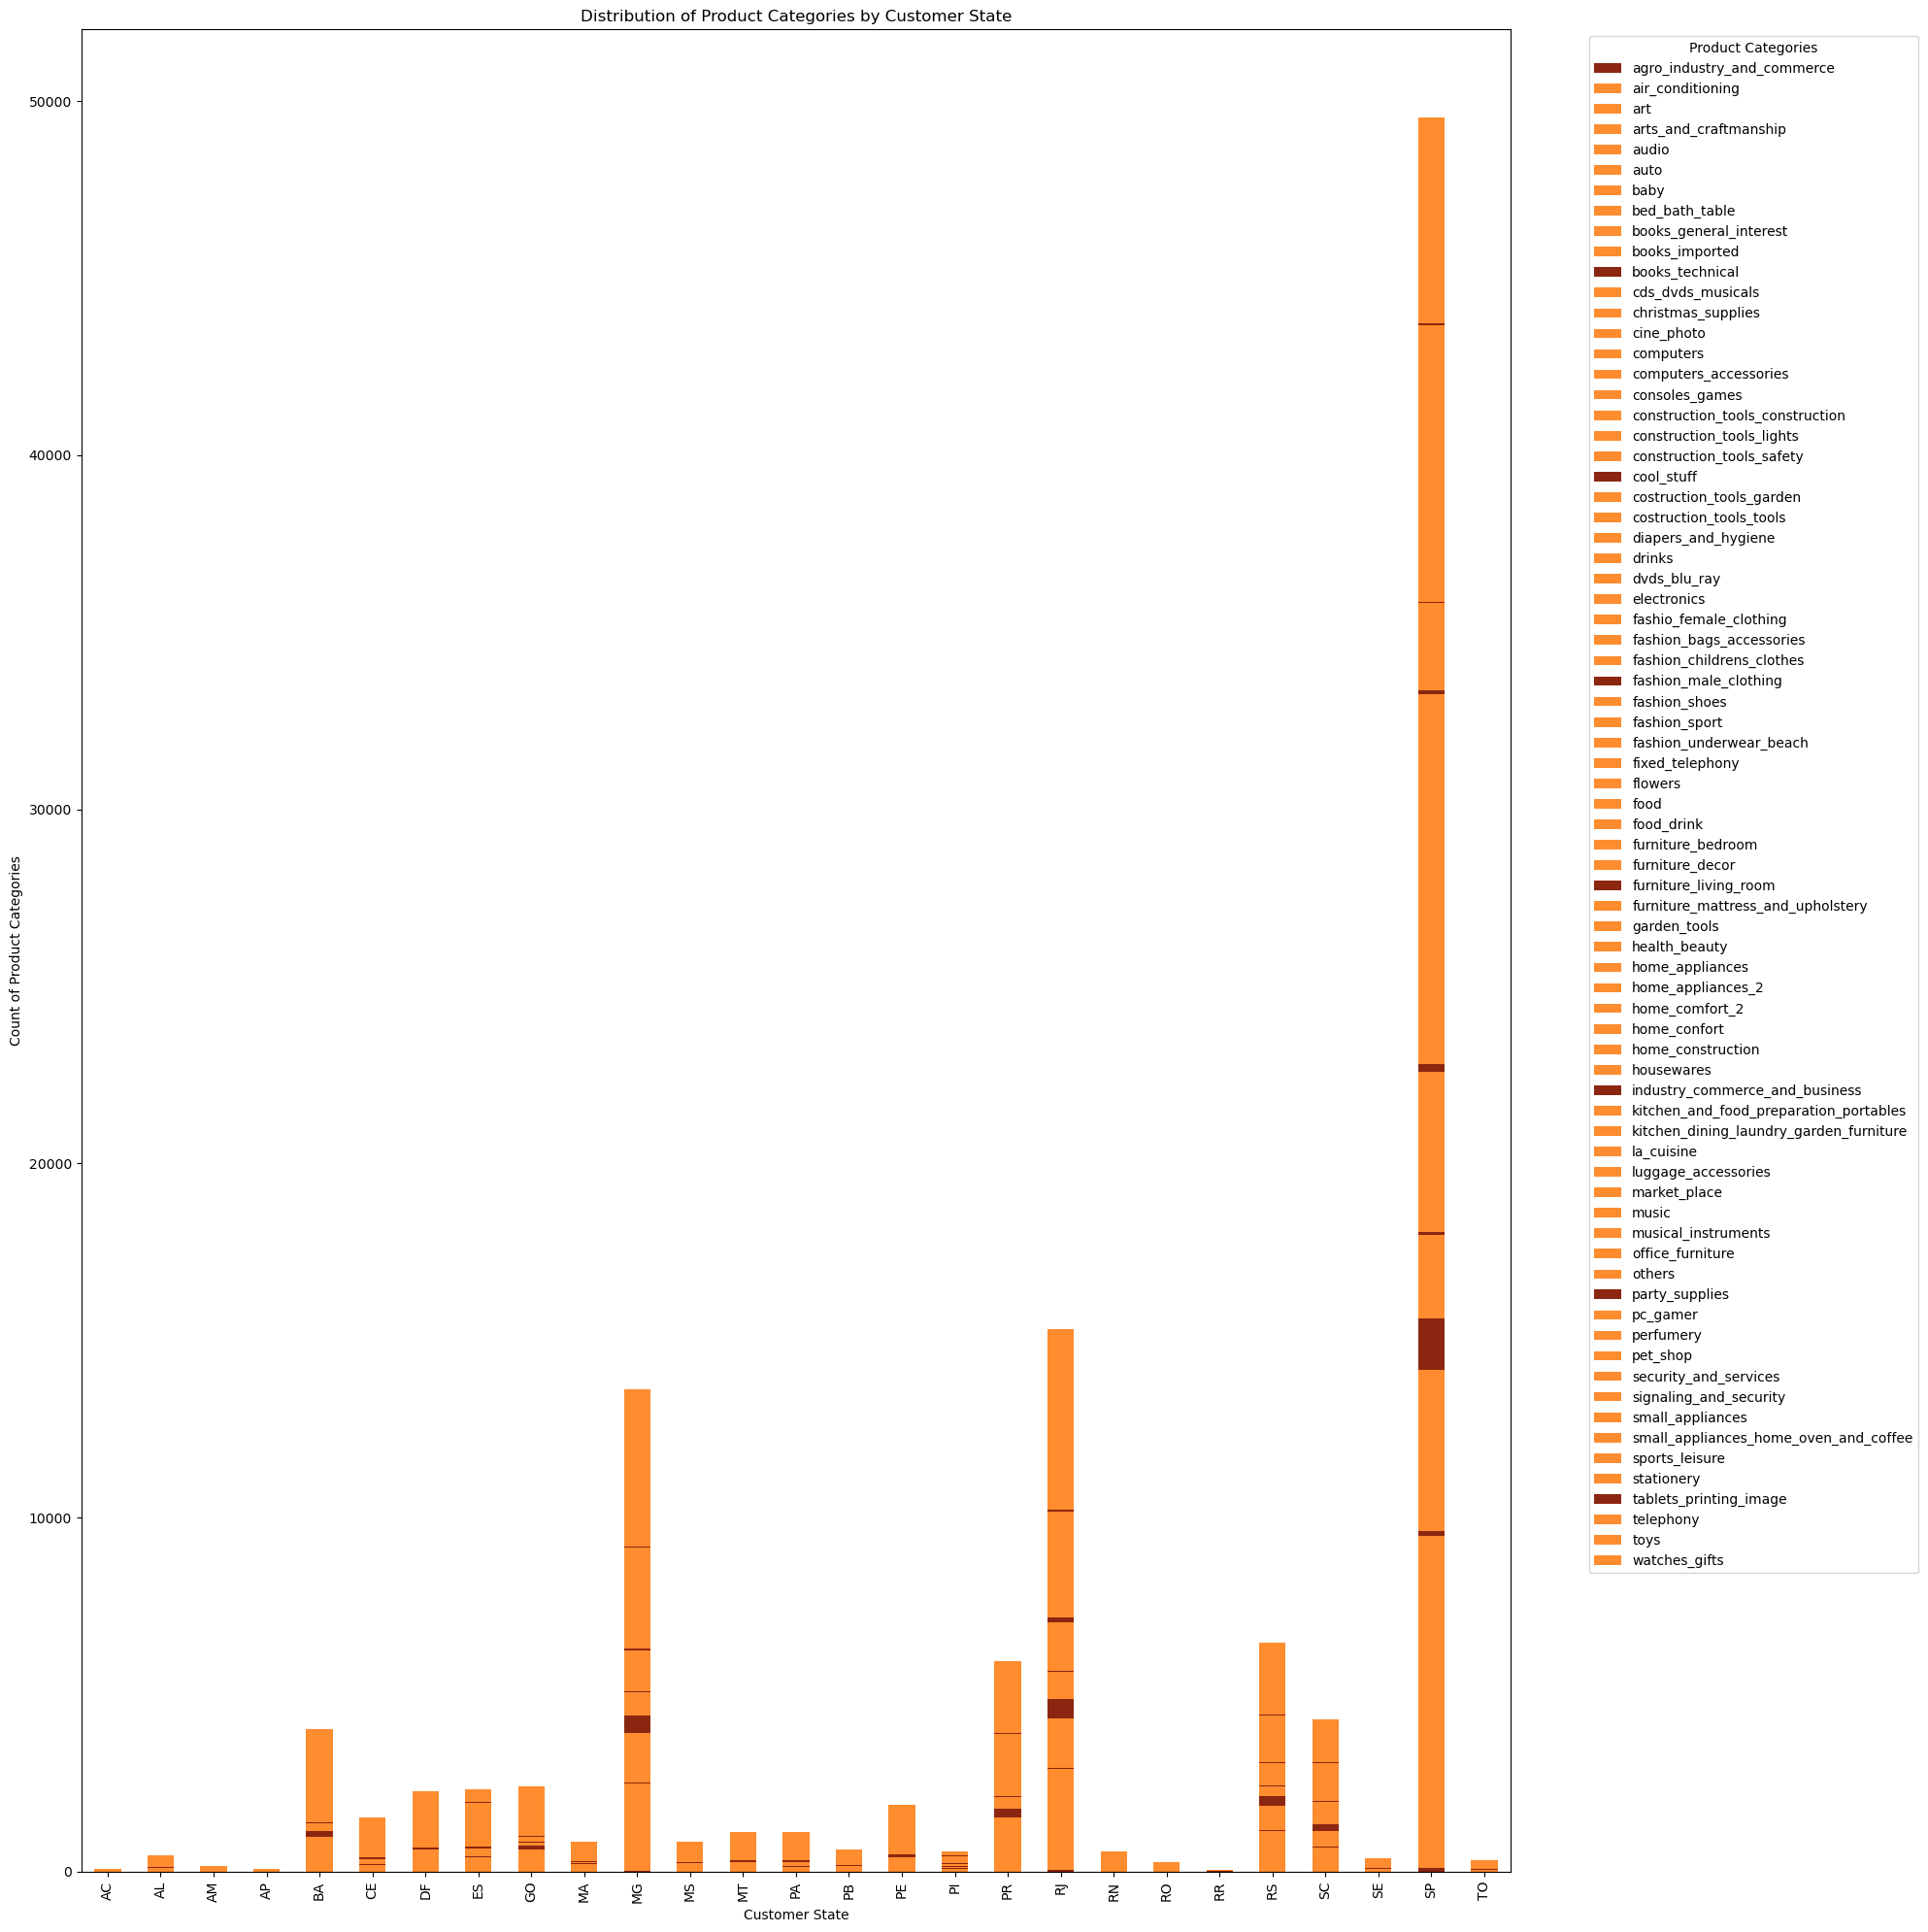

In [77]:
# Create Stacked Bar Chart

# Convert the Series to a DataFrame and unstack
category_geo_df = category_geo.unstack(level='product_category_name').fillna(0)

# Plotting
category_geo_df.plot(kind='bar', stacked=True, figsize=(20, 20), color=colors)

plt.title('Distribution of Product Categories by Customer State')
plt.xlabel('Customer State')
plt.ylabel('Count of Product Categories')
plt.legend(title='Product Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.savefig('Distribution of Product Categories by Customer State.png')

plt.show()

Since the chart is too complicated, I would like to create a chart on Tableau for better understanding. Please follow the links here: 
https://public.tableau.com/views/ProductCategoryDistribution/Dashboard2?:language=en-US&:sid=&:display_count=n&:origin=viz_share_link

In [78]:
# Save the DataFrame to CSV for Tableau dataset prupose
category_geo.to_csv('category_geo.csv', index=True)

## Payment Analysis

In this section, we are going to look at the following things:

1. Payment Type
2. Installments
3. Payment Trends

The datasets we are using include: Payments, Orders, Customers

In [79]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [80]:
import cufflinks as cf

### 1. Payment Type

In [81]:
customers_orders_payments

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
...                                  ...                               ...   
103861  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
103862  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
103863  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
103864  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
103865  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp   order_approved_at  \
0         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3         delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
4         delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
...             ...                      ...                 ...   
103861    delivered      2017-03-09 09:54:05 2017-03-09 09:54:05   
103862    delivered      2018-02-06 12:58:58 2018-02-06 13:10:37   
103863    delivered      2017-08-27 14:46:43 2017-08-27 15:04:16   
103864    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
103865    delivered      2018-03-08 20:57:30 2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-10-04 19:55:00           2017-10-10 21:25:13   
2               2017-10-04 19:55:00           2017-10-10 21:25:13   
3               2018-07-26 14:31:00           2018-08-07 15:27:45   
4               2018-08-08 13:50:00           2018-08-17 18:06:29   
...                             ...                           ...   
103861          2017-03-10 11:18:03           2017-03-17 15:08:01   
103862          2018-02-07 23:22:42           2018-02-28 17:37:56   
103863          2017-08-28 20:52:26           2017-09-21 11:24:17   
103864          2018-01-12 15:35:03           2018-01-25 23:32:54   
103865          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date year_month  year  day_of_week  \
0                         2017-10-18    2017-10  2017            0   
1                         2017-10-18    2017-10  2017            0   
2                         2017-10-18    2017-10  2017            0   
3                         2018-08-13    2018-07  2018            1   
4                         2018-09-04    2018-08  2018            2   
...                              ...        ...   ...          ...   
103861                    2017-03-28    2017-03  2017            3   
103862                    2018-03-02    2018-02  2018            1   
103863                    2017-09-27    2017-08  2017            6   
103864                    2018-02-15    2018-01  2018            0   
103865                    2018-04-03    2018-03  2018            3   

        hour_of_day time_period                customer_unique_id  \
0                10     Morning  7c396fd4830fd04220f754e42b4e5bff   
1                10     Morning  7c396fd4830fd04220f754e42b4e5bff   
2                10     Morning  7c396fd4830fd04220f754e42b4e5bff   
3                20       Night  af07308b275d755c9edb36a90c618231   
4                 8     Morning  3a653a41f6f9fc3d2a113cf8398680e8   
...             ...         ...                               ...   
103861            9     Morning  6359f309b166b0196dbf7ad2ac62bb5a   
103862           12   Afternoon  da62f9e57a76d978d02ab53

In [82]:
# Save the DataFrame to CSV for future reference
customers_orders_payments.to_csv('customers_orders_payments.csv', index=False)

#### a. Numbers of Transaction by Payment Type

In [83]:
payment_type_count = customers_orders_payments['payment_type'].value_counts()
payment_type_count

payment_type
credit_card    76795
boleto         19784
voucher         5756
debit_card      1529
not_defined        2
Name: count, dtype: int64

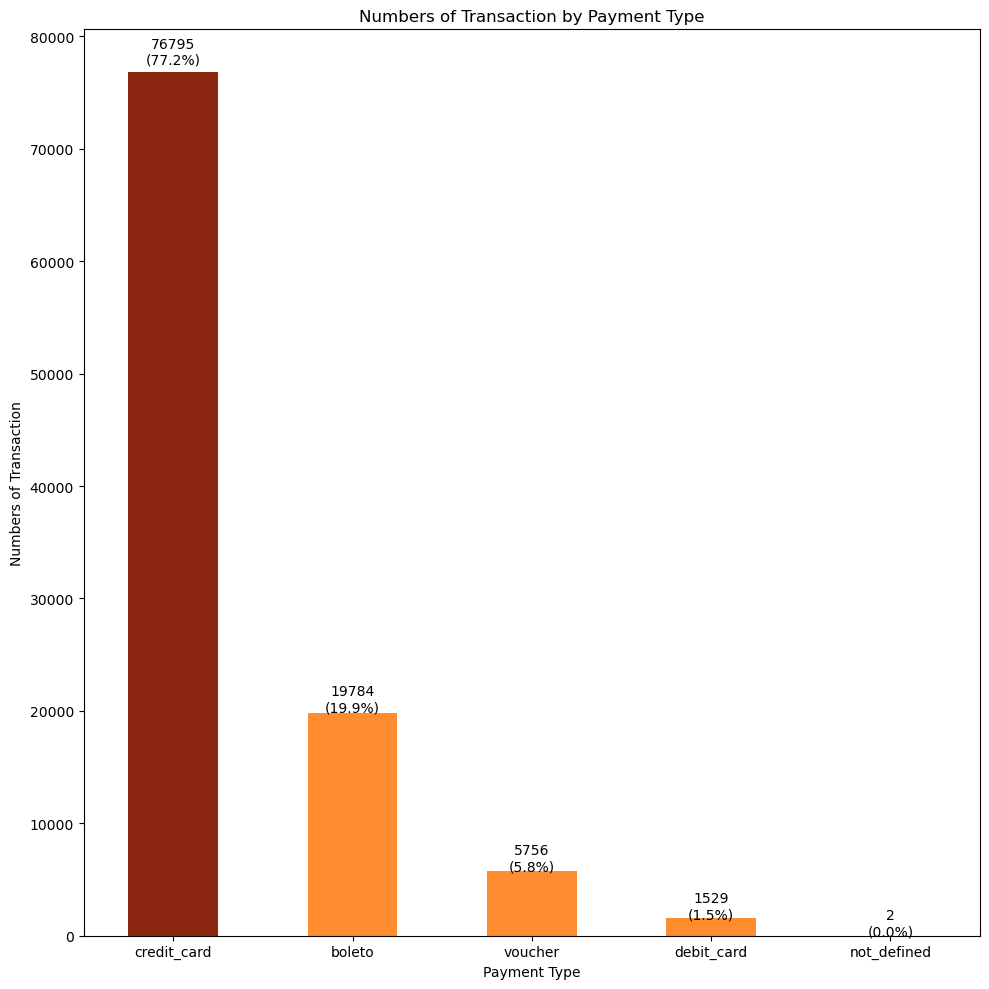

In [84]:
# Create a new figure with a specific size (width, height)
plt.figure(figsize=(10, 10))

# Create a color list
# 'skyblue' if the value is not the max value, 'darkblue' if it is
colors = ['#8b2610' if x == max(payment_type_count) else '#ff8c2f' for x in payment_type_count]

# Create the bar chart with custom colors
ax = payment_type_count.plot(kind='bar', color=colors)

# Rotate x-axis labels to be horizontal
plt.xticks(rotation=0)

plt.xlabel('Payment Type')
plt.ylabel('Numbers of Transaction')
plt.title('Numbers of Transaction by Payment Type')

total = order_status_counts.sum()

# Add count numbers and percentage on top of each bar, each on a separate line
for p in ax.patches:
    count = p.get_height()
    percentage = '{:.1f}%'.format(100 * count/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() * 1.01
    ax.annotate(f'{count}\n({percentage})', (x, y), ha='center')

# Adjust layout to make sure everything fits
plt.tight_layout()

plt.savefig('Numbers of Transaction by Payment Type.png')

plt.show()

The most popular payment type is credit card and boleto* got the second-highest user.

*Boleto is a popular payment method in Brazil, it's a printed or virtual voucher with a barcode.

#### b. Total Amount Paid by Payment Type

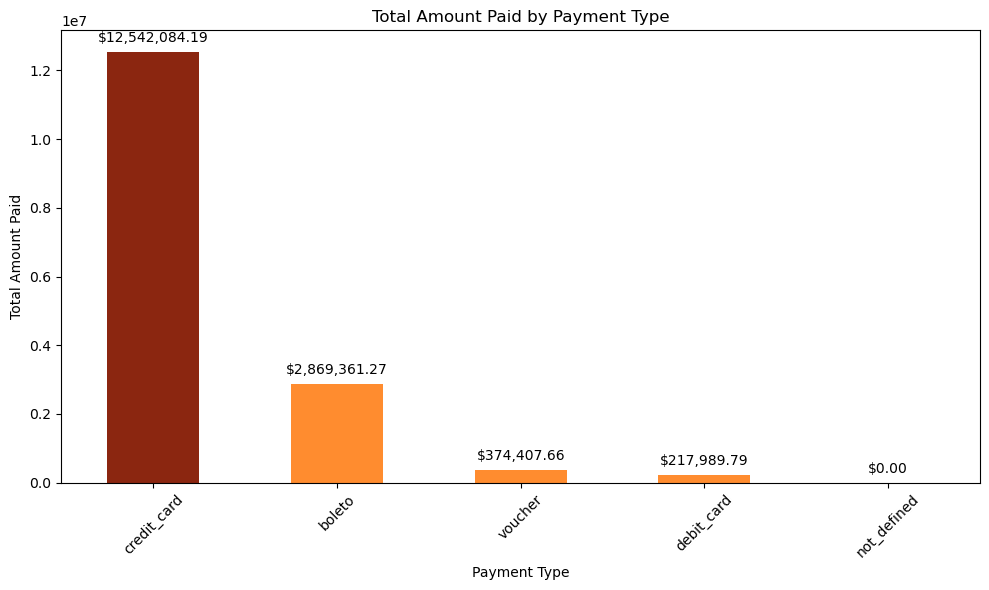

In [85]:
# Aggregate payment values by payment type
payment_type_amount = customers_orders_payments.groupby('payment_type')['payment_value'].sum().sort_values(ascending=False)

# Identify the payment type with the max total payment
max_payment_type = payment_type_amount.idxmax()

# Create color list for visualization
colors = ['#8b2610' if payment_type == max_payment_type else '#ff8c2f' for payment_type in payment_type_amount.index]

# Plotting
plt.figure(figsize=(10, 6))
ax = payment_type_amount.plot(kind='bar', color=colors)
plt.title('Total Amount Paid by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Total Amount Paid')
plt.xticks(rotation=45)

# Annotate total amount on top of each bar
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()

plt.savefig('Total Amount Paid by Payment Type.png')

plt.show()

For the total amount paid in different payment types, credit card is still the highest, and the second-highest is boleto.

#### c. Number of Transactions by State and Payment Type

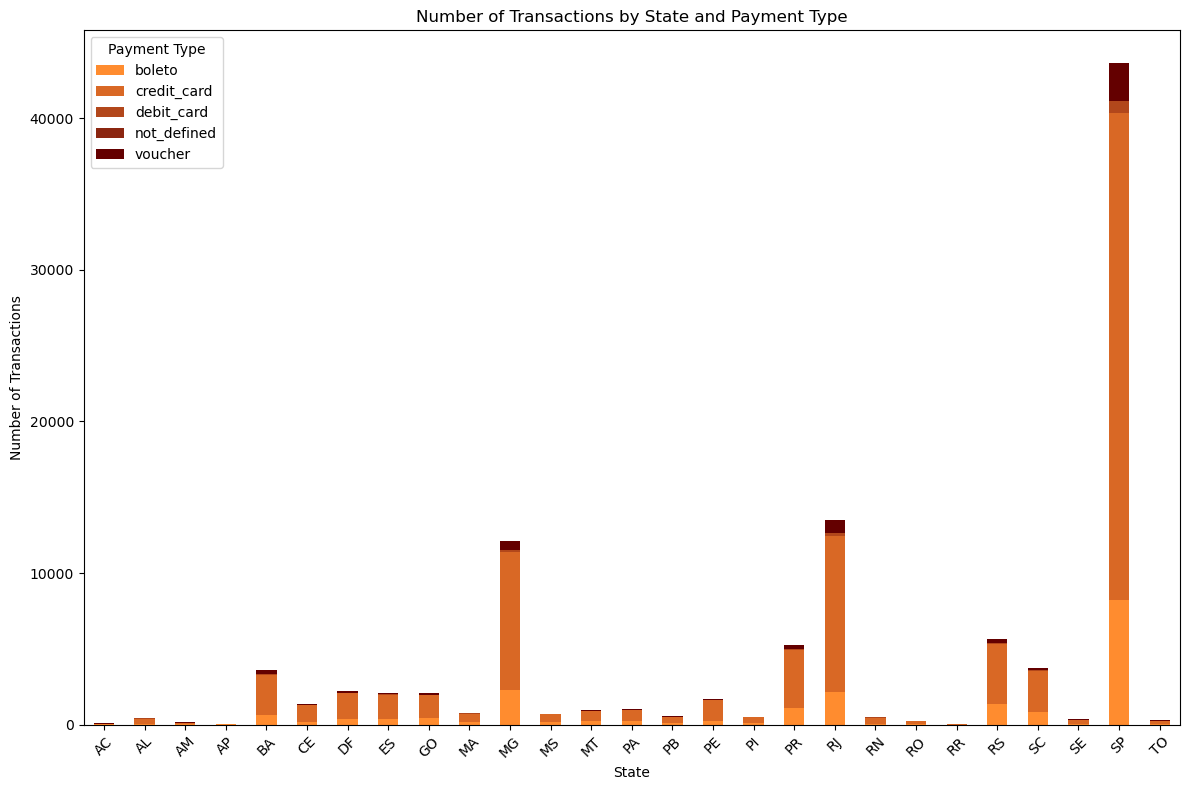

In [86]:
# Aggregate the data: Count transactions by state and payment type
grouped_data = customers_orders_payments.groupby(['customer_state', 'payment_type']).size().unstack(fill_value=0)

# Define the colors
colors = ['#ff8c2f', '#d96825', '#b2471b', '#8b2610', '#640000']

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data.plot(kind='bar', stacked=True, color=colors, ax=ax)

plt.title('Number of Transactions by State and Payment Type')
plt.xlabel('State')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.legend(title='Payment Type')

plt.tight_layout()

plt.savefig('Number of Transactions by State and Payment Type.png')

plt.show()

SP (São Paulo) had the highest number of transactions with most of them using credit card, following by boleto*.

### 2. Installments

#### a. Installment count per payment

In [87]:
# Filter transactions with more than one installment
more_than_one_installment = customers_orders_payments[customers_orders_payments['payment_installments'] > 1]

# Check which payment types have more than one installment
payment_types_with_more_than_one_installment = more_than_one_installment['payment_type'].unique()

# Calculate the mean of installments for each payment type
mean_installments_by_payment_type = customers_orders_payments.groupby('payment_type')['payment_installments'].mean()

# Display the results
print("Payment Types with more than one installment:", payment_types_with_more_than_one_installment)
print("\nMean of installments by payment type:")
print(mean_installments_by_payment_type)

Payment Types with more than one installment: ['credit_card']

Mean of installments by payment type:
payment_type
boleto         1.000000
credit_card    3.507155
debit_card     1.000000
not_defined    1.000000
voucher        1.000000
Name: payment_installments, dtype: float64


Only credit card have more than one installment, with a mean around 3.5.

#### b. Distribution of Payment Installments by Customer State

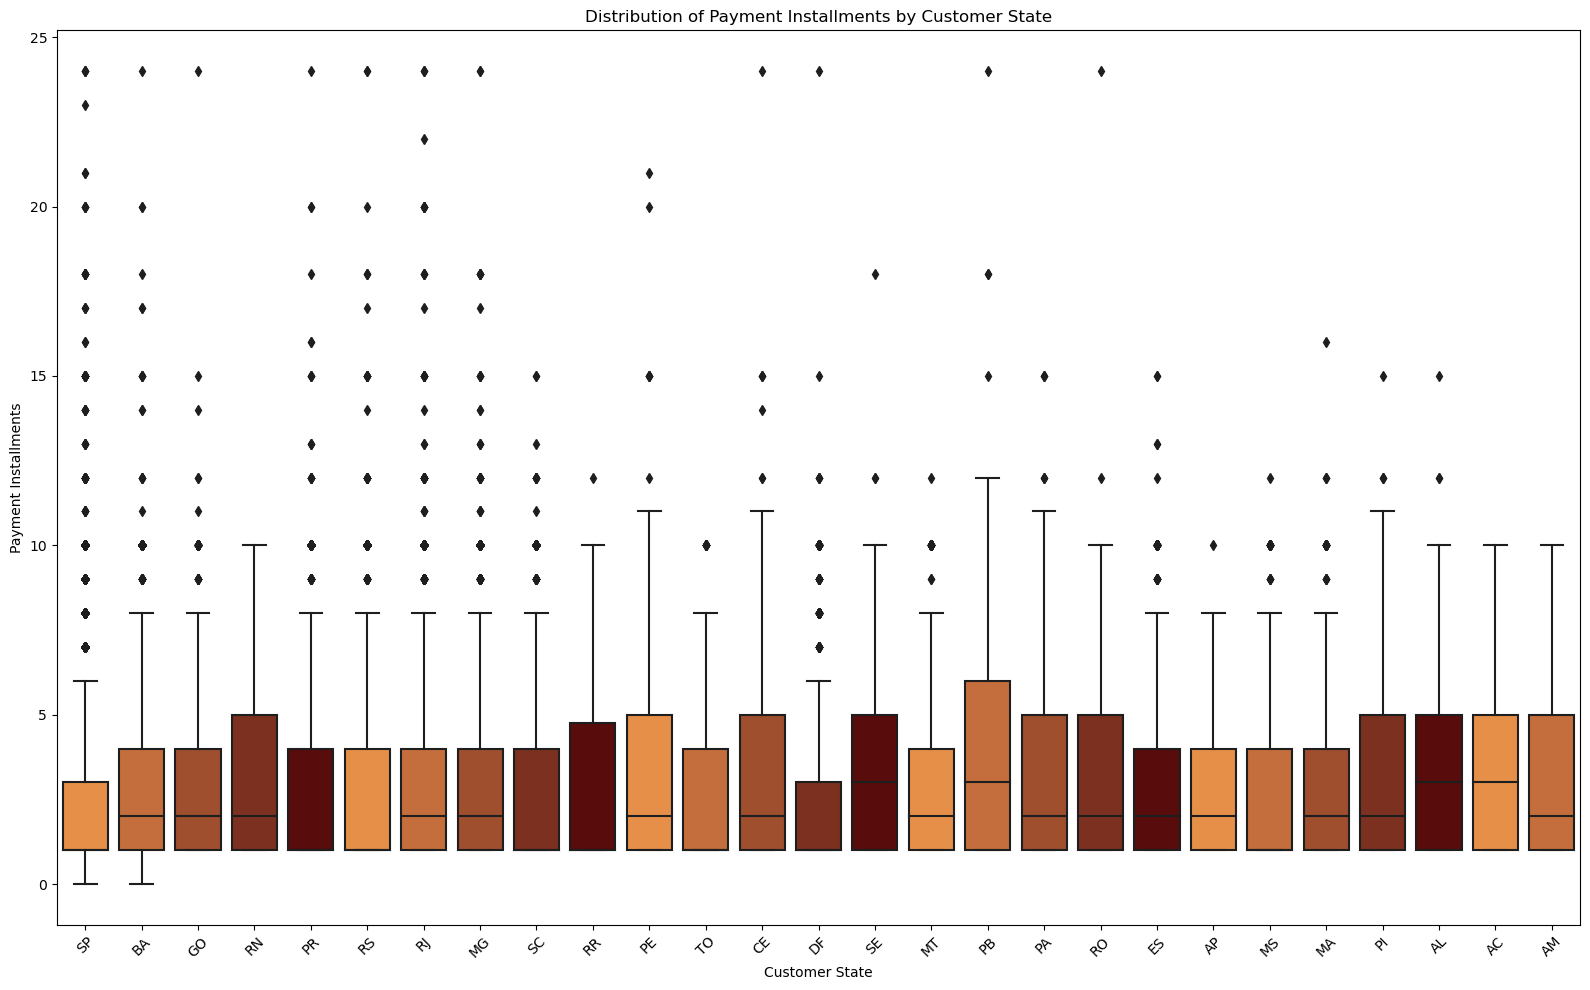

In [88]:
plt.figure(figsize=(16, 10))  # Adjust the figure size as needed
sns.boxplot(x='customer_state', y='payment_installments', data=customers_orders_payments, palette=colors)

plt.title('Distribution of Payment Installments by Customer State')
plt.xlabel('Customer State')
plt.ylabel('Payment Installments')
plt.xticks(rotation=45)  # Rotate state labels for better readability

plt.tight_layout()

plt.savefig('Distribution of Payment Installments by Customer State.png')

plt.show()

The boxplot indicates numerous outliers for each state, which are the points beyond the whiskers, suggesting that there are installment values much higher than typical for each state.
For states like SP, where the median line (not the mean, as boxplots typically show medians) is closer to the bottom of the box (the first quartile), it implies that the distribution of installment numbers is right-skewed, with more customers choosing fewer installments and a few choosing many more, which appears as outliers on the boxplot.

### 3. Payment Trends

In [89]:
customers_orders_payments['Year'] = pd.to_datetime(customers_orders_payments['order_purchase_timestamp']).dt.year
customers_orders_payments['Year'].unique()

array([2017, 2018, 2016], dtype=int32)

There are three years in this customers dataset: 2016, 2017 and 2018.

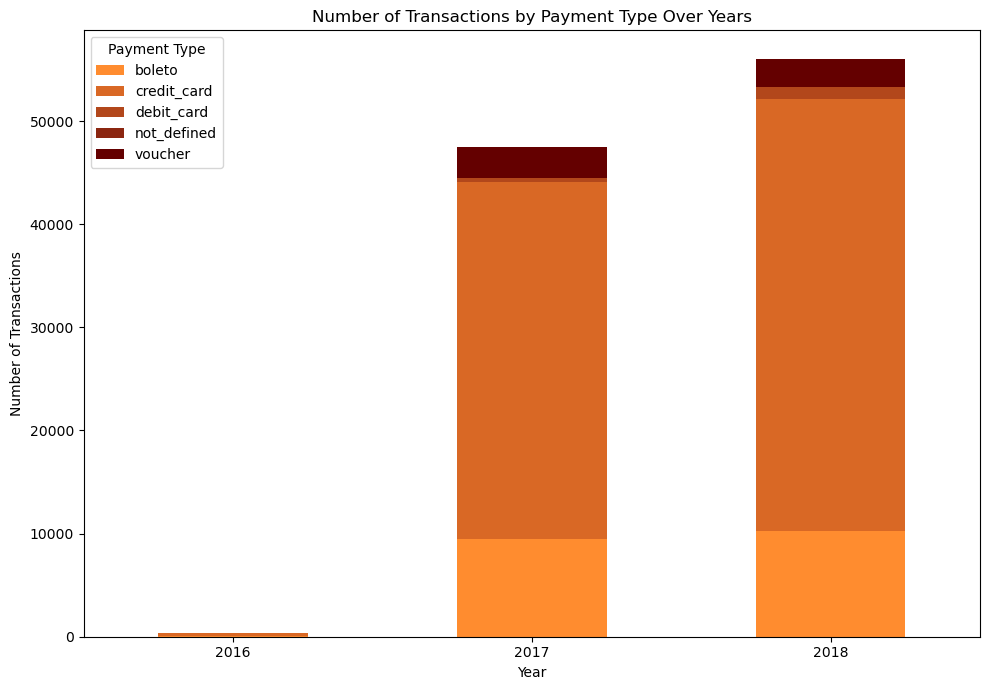

In [90]:
# Create Stacked Bar Chart by each year

# Ensure 'order_purchase_timestamp' is a datetime if not already
customers_orders_payments['order_purchase_timestamp'] = pd.to_datetime(customers_orders_payments['order_purchase_timestamp'])

# Extract the year from 'order_purchase_timestamp'
customers_orders_payments['year'] = customers_orders_payments['order_purchase_timestamp'].dt.year

# Group by year and payment type, then count transactions
transaction_counts_by_year = customers_orders_payments.groupby(['year', 'payment_type']).size().unstack(fill_value=0)

# Plotting
transaction_counts_by_year.plot(kind='bar', stacked=True, figsize=(10, 7), color=colors)

plt.title('Number of Transactions by Payment Type Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.legend(title='Payment Type')
plt.xticks(rotation=0)  # Keep the year labels horizontal

plt.tight_layout()

plt.savefig('Number of Transactions by Payment Type Over Years.png')

plt.show()

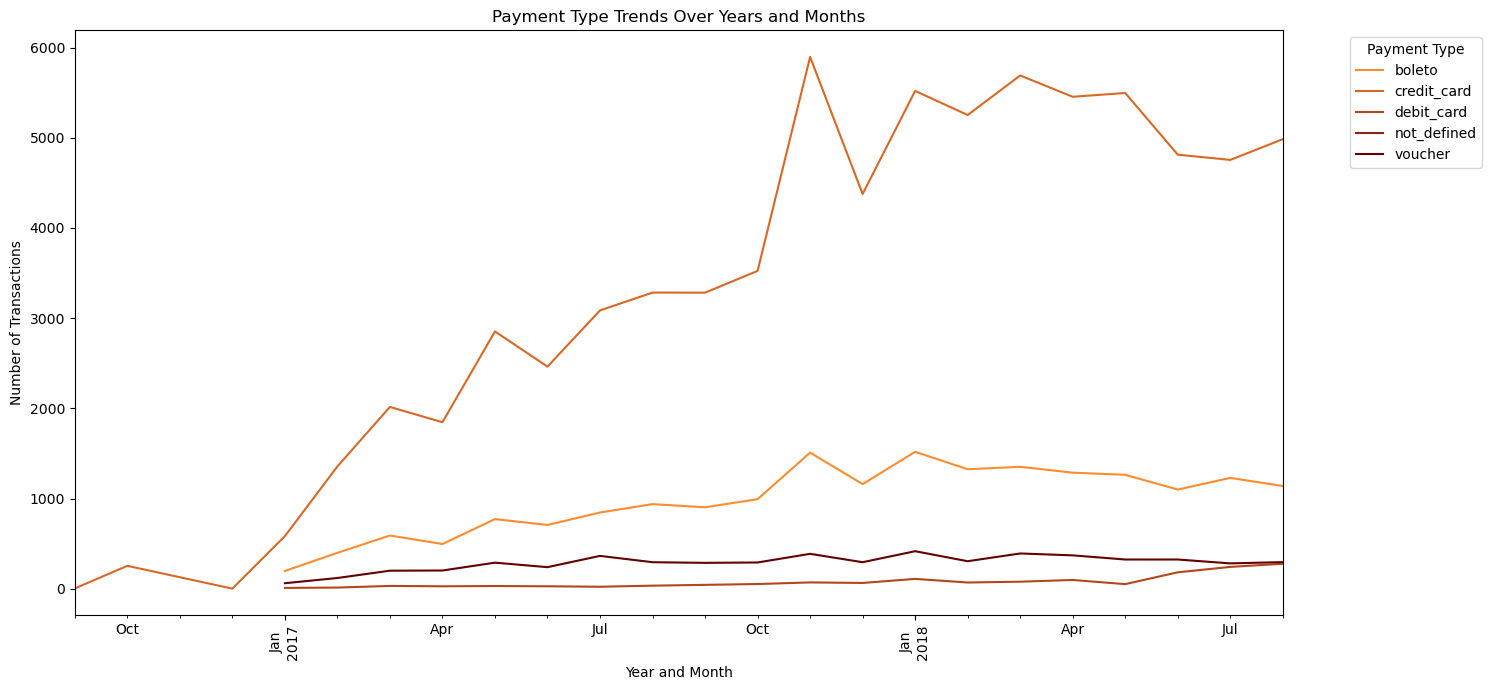

In [91]:
# Payment Type Trend
# Ensure the date column is in datetime format
customers_orders_payments['order_purchase_timestamp'] = pd.to_datetime(customers_orders_payments['order_purchase_timestamp'])

# Extract year and month from the datetime column
customers_orders_payments['YearMonth'] = customers_orders_payments['order_purchase_timestamp'].dt.to_period('M')

# Plotting the payment type trend over the years and months
fig, ax = plt.subplots(figsize=(15, 7))
payment_type_trend = customers_orders_payments.groupby(['YearMonth', 'payment_type']).size().unstack()
payment_type_trend.plot(ax=ax, color=colors)

plt.title('Payment Type Trends Over Years and Months')
plt.xlabel('Year and Month')
plt.ylabel('Number of Transactions')
plt.legend(title='Payment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)

plt.tight_layout()  # Adjust the layout to make sure everything fits

plt.savefig('Payment Type Trends Over Years and Months.png')

plt.show()

Credit card transactions dominate and have a significant fluctuation, with peaks and troughs over the observed period, while other payment methods maintain a relatively consistent but much lower number of transactions.

## Delivery Analysis

In this section, we are going to look at the following things:

1. Relationship between Avg.Delivery Time, Avg. Carrier Time & Review Score
2. Relationship between Fast Delivery** & Review Score

**Fast Delivery: comparing "Delivered Date" and "Estimated Date". If Delivered Date is faster than Estimated Date, it'll be identified as Fast Delivery.

3. Freight Value trend from 2016 to 2018, and the relationship with Avg.Delivery Time and Avg. Review Score
4. Total Orders (count), Avg. Delivery Time and Freight Value across the states in Brazil

The datasets we are using include: Orders, Order_reviews, Order_items, Customers

### 1. Relationship between Avg.Delivery Time, Avg. Carrier Time & Review Score

In [92]:
# Join two datasets: orders_dataset & order_reviews_dataset
filtered_orders_reviews = pd.merge(filtered_orders, order_reviews, on="order_id", how="left", indicator = True )

Since we are conducting delivery-related analysis, we are only focusing on the orders whose status is "Delivered," so we have to filter the datasets first.

In [93]:
# Clean the dataset, fliter by "delivered" orders only
filtered_orders_reviews = filtered_orders_reviews.drop_duplicates(subset=['order_id'], ignore_index=True)
delivered_order = filtered_orders_reviews[filtered_orders_reviews['order_status'] == 'delivered']
delivered_order = delivered_order [~delivered_order['order_delivered_customer_date'].isnull()]
delivered_order = delivered_order.loc[delivered_order.order_delivered_customer_date > delivered_order.order_approved_at]
delivered_order = delivered_order.loc[delivered_order['_merge'] =='both']

In [94]:
# Ensure the dates are in datetime format
delivered_order['order_purchase_timestamp'] = pd.to_datetime(delivered_order['order_purchase_timestamp'])
delivered_order['order_approved_at'] = pd.to_datetime(delivered_order['order_approved_at'])
delivered_order['order_delivered_carrier_date'] = pd.to_datetime(delivered_order['order_delivered_carrier_date'])
delivered_order['order_delivered_customer_date'] = pd.to_datetime(delivered_order['order_delivered_customer_date'])
delivered_order['order_estimated_delivery_date'] = pd.to_datetime(delivered_order['order_estimated_delivery_date'])

# Add two columns: 1) Avg. deliver time (delivered time - purchase time) & 2) Avg.carrier time (carrier time - purchase time)
# Subtract the dates to get Timedelta Series
delivered_order['avg.delivery'] = delivered_order['order_delivered_customer_date'] - delivered_order['order_purchase_timestamp']
delivered_order['avg.carrier'] = delivered_order['order_delivered_carrier_date'] - delivered_order['order_purchase_timestamp']

# Convert Timedelta to integer days
delivered_order['avg.delivery'] = delivered_order['avg.delivery'].apply(lambda x: x.days).fillna(0).astype(int)
delivered_order['avg.carrier'] = delivered_order['avg.carrier'].apply(lambda x: x.days).fillna(0).astype(int)

In [95]:
delivered_order

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99416  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99417  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99418  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99419  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99420  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp   order_approved_at  \
0        delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   
...            ...                      ...                 ...   
99416    delivered      2017-03-09 09:54:05 2017-03-09 09:54:05   
99417    delivered      2018-02-06 12:58:58 2018-02-06 13:10:37   
99418    delivered      2017-08-27 14:46:43 2017-08-27 15:04:16   
99419    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
99420    delivered      2018-03-08 20:57:30 2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99416          2017-03-10 11:18:03           2017-03-17 15:08:01   
99417          2018-02-07 23:22:42           2018-02-28 17:37:56   
99418          2017-08-28 20:52:26           2017-09-21 11:24:17   
99419          2018-01-12 15:35:03           2018-01-25 23:32:54   
99420          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date year_month  year  day_of_week  \
0                        2017-10-18    2017-10  2017            0   
1                        2018-08-13    2018-07  2018            1   
2                        2018-09-04    2018-08  2018            2   
3                        2017-12-15    2017-11  2017            5   
4                        2018-02-26    2018-02  2018            1   
...                             ...        ...   ...          ...   
99416                    2017-03-28    2017-03  2017            3   
99417                    2018-03-02    2018-02  2018            1   
99418                    2017-09-27    2017-08  2017            6   
99419                    2018-02-15    2018-01  2018            0   
99420                    2018-04-03    2018-03  2018            3   

       hour_of_day time_period                         review_id  \
0               10     Morning  a54f0611adc9ed256b57ede6b6eb5114   
1               20       Night  8d5266042046a06655c8db133d120ba5   
2                8     Morning  e73b67b67587f7644d5bd1a52deb1b01   
3               19       Night  359d03e676b3c069f62cadba8dd3f6e8   
4               21       Night  e50934924e227544ba8246aeb3770dd4   
...            ...         ...                               ...   
99416            9     Morning  e262b3f92d1ce917aa412a9406cf61a6   
99417           12   Afternoon  29bb71b2760d0f876dfa178a76bc4734   
99418           14   Afternoon  37157977121

In [96]:
delivered_order.groupby(['year']).mean(numeric_only = True)

day_of_week  hour_of_day  review_score  avg.delivery  avg.carrier
year                                                                   
2016     2.651515    14.727273      4.003788     18.920455    13.306818
2017     2.797186    14.799926      4.174467     12.496889     2.938571
2018     2.723981    14.753439      4.141568     11.661477     2.505657

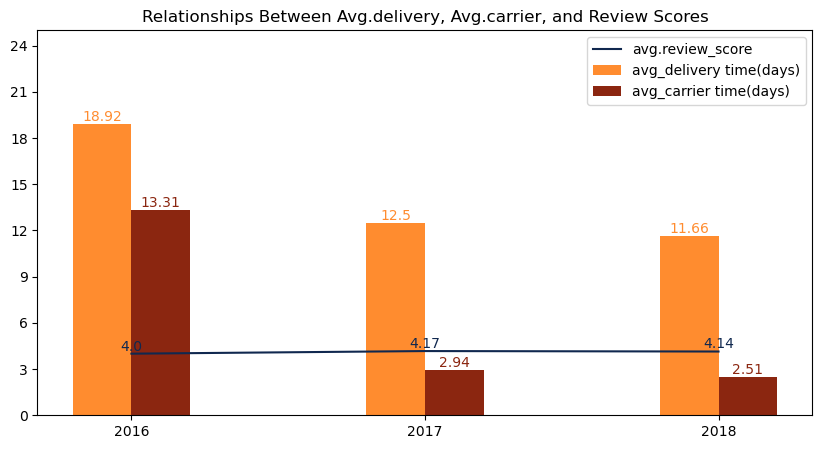

In [97]:
# Display the relationships between avg.delivery, avg.carrier and review scores over the years from 2016-2018
fig = plt.figure(figsize=(10,5))
year = [2016,2017,2018]

avg_delivery =list(delivered_order.groupby(['year']).mean(numeric_only = True)['avg.delivery'])
round_d = [round(elem, 2) for elem in avg_delivery]

avg_carrier =list(delivered_order.groupby(['year']).mean(numeric_only = True)['avg.carrier'])
round_c = [round(elem, 2) for elem in avg_carrier]

review_score = list(delivered_order.groupby(['year']).mean(numeric_only = True)['review_score'])
round_s = [round(elem, 2) for elem in review_score]

#Create an axes

X_axis = np.arange(len(year))
width = 0.1

plt.bar(X_axis-width, round_d ,width=0.2,color='#ff8c2f', label = 'avg_delivery time(days)')

plt.bar(X_axis+width, round_c ,width=0.2,color='#8b2610', label = 'avg_carrier time(days)')

#Add line chart to the same axes (ax1)

plt.plot(X_axis, round_s, color = '#10284F', label = 'avg.review_score')

plt.title('Relationships Between Avg.delivery, Avg.carrier, and Review Scores')
plt.xticks(X_axis, year)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer = True))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer = True))
plt.legend()

for i, w, m, s in zip(X_axis, round_d, round_c, round_s):
    plt.text(i - width, w + 0.2, str(w), color='#ff8c2f',
             horizontalalignment='center')

    plt.text(i + width, m + 0.2, str(m), color='#8b2610',
             horizontalalignment='center')

    plt.text(i, s + 0.2, str(s), color='#10284F',
             horizontalalignment='center')

plt.ylim(0, 25)

plt.savefig('Relationships Between Avg.delivery, Avg.carrier, and Review Scores.png')

plt.show()

Avg. delivery time and Avg. carrier time have become faster. However, the delivery time has shortened, it didn't affect the Avg. review score.

### 2. Relationship between Fast Delivery & Review Score

In [98]:
# Create a column called "fast_delivery."
delivered_order['fast_delivery']= delivered_order.apply(lambda x : 1 if (x['order_delivered_customer_date'] - x['order_estimated_delivery_date']).days < 1 else 0, axis = 1)

# Select the orders that are identified as fast delivery
delivered_order.loc[delivered_order['fast_delivery'] == 1]

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99416  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99417  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99418  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99419  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99420  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp   order_approved_at  \
0        delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   
...            ...                      ...                 ...   
99416    delivered      2017-03-09 09:54:05 2017-03-09 09:54:05   
99417    delivered      2018-02-06 12:58:58 2018-02-06 13:10:37   
99418    delivered      2017-08-27 14:46:43 2017-08-27 15:04:16   
99419    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
99420    delivered      2018-03-08 20:57:30 2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99416          2017-03-10 11:18:03           2017-03-17 15:08:01   
99417          2018-02-07 23:22:42           2018-02-28 17:37:56   
99418          2017-08-28 20:52:26           2017-09-21 11:24:17   
99419          2018-01-12 15:35:03           2018-01-25 23:32:54   
99420          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date year_month  year  day_of_week  \
0                        2017-10-18    2017-10  2017            0   
1                        2018-08-13    2018-07  2018            1   
2                        2018-09-04    2018-08  2018            2   
3                        2017-12-15    2017-11  2017            5   
4                        2018-02-26    2018-02  2018            1   
...                             ...        ...   ...          ...   
99416                    2017-03-28    2017-03  2017            3   
99417                    2018-03-02    2018-02  2018            1   
99418                    2017-09-27    2017-08  2017            6   
99419                    2018-02-15    2018-01  2018            0   
99420                    2018-04-03    2018-03  2018            3   

       hour_of_day time_period                         review_id  \
0               10     Morning  a54f0611adc9ed256b57ede6b6eb5114   
1               20       Night  8d5266042046a06655c8db133d120ba5   
2                8     Morning  e73b67b67587f7644d5bd1a52deb1b01   
3               19       Night  359d03e676b3c069f62cadba8dd3f6e8   
4               21       Night  e50934924e227544ba8246aeb3770dd4   
...            ...         ...                               ...   
99416            9     Morning  e262b3f92d1ce917aa412a9406cf61a6   
99417           12   Afternoon  29bb71b2760d0f876dfa178a76bc4734   
99418           14   Afternoon  37157977121

In [99]:
# To see the ratio of fast delivery for each year
ratio_year = delivered_order.groupby(['year','fast_delivery'])['fast_delivery'].count().reset_index(name='count')
ratio_year['ratio'] = round ((ratio_year['count'] / ratio_year.groupby('year')['count'].transform('sum')) * 100,2)
ratio_year

year  fast_delivery  count  ratio
0  2016              0      3   1.14
1  2016              1    261  98.86
2  2017              0   2384   5.53
3  2017              1  40690  94.47
4  2018              0   3993   7.62
5  2018              1  48420  92.38

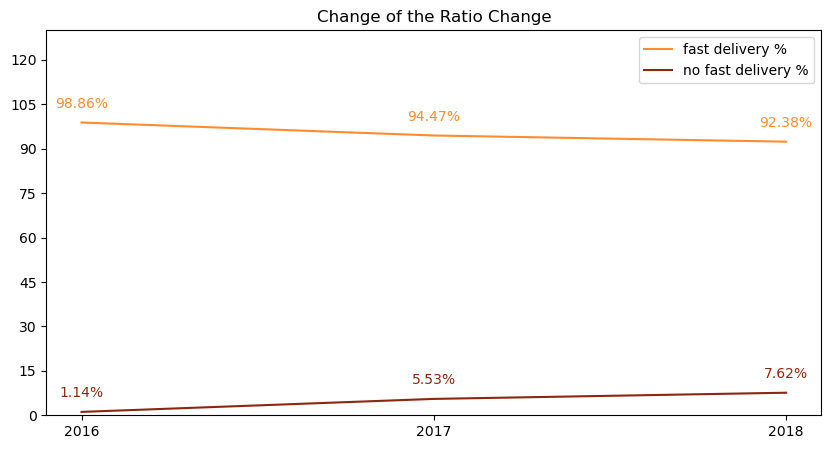

In [100]:
# Draw 2 line charts to see the change of the ratio change over 3 years
fig = plt.figure(figsize=(10,5))
year = [2016,2017,2018]

fast_delivery =list(ratio_year[ratio_year.fast_delivery == 1]["ratio"])
round_f = [round(elem, 2) for elem in fast_delivery]

no_fast_delivery =list(ratio_year[ratio_year.fast_delivery == 0]["ratio"])
round_nf = [round(elem, 2) for elem in no_fast_delivery]


#Create an axes

X_axis = np.arange(len(year))

plt.plot(X_axis, round_f ,color='#ff8c2f', label = 'fast delivery %')

plt.plot(X_axis, round_nf, color='#8b2610', label = 'no fast delivery %')

plt.title('Change of the Ratio Change')
plt.xticks(X_axis, year)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer = True))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer = True))
plt.legend()

for i, w, m in zip(X_axis, round_f, round_nf):
    plt.text(i, w + 5 , str(w) + "%", color='#ff8c2f',
             horizontalalignment='center')

    plt.text(i, m + 5, str(m)+ "%", color='#8b2610',
             horizontalalignment='center')

plt.ylim(0, 130)

plt.savefig('Change of the Ratio Change.png')

plt.show()

In [101]:
# To see if fast delivery will have an impact on the avg. review score
review_delivered = round(delivered_order.groupby(['year','fast_delivery'])['review_score'].mean(),2).reset_index(name='score')
review_delivered

year  fast_delivery  score
0  2016              0   2.00
1  2016              1   4.03
2  2017              0   2.32
3  2017              1   4.28
4  2018              0   2.24
5  2018              1   4.30

The ratio of Fast delivery has declined. The review score of orders that have Fast Delivery is generally higher than those that don't have Fast Delivery.

### 3. Freight Value trend from 2016 to 2018, and the relationship with Avg.Delivery Time and Avg. Review Score

In [102]:
# Join the previous dataset with "Order_items"
delivered_order_items = pd.merge(delivered_order, order_items, on="order_id", how="left", indicator = 'Merge' )
delivered_order_items

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3       949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4       ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                  ...                               ...   
109275  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
109276  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
109277  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
109278  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
109279  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp   order_approved_at  \
0         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1         delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2         delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3         delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4         delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   
...             ...                      ...                 ...   
109275    delivered      2018-02-06 12:58:58 2018-02-06 13:10:37   
109276    delivered      2017-08-27 14:46:43 2017-08-27 15:04:16   
109277    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
109278    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
109279    delivered      2018-03-08 20:57:30 2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2018-07-26 14:31:00           2018-08-07 15:27:45   
2               2018-08-08 13:50:00           2018-08-17 18:06:29   
3               2017-11-22 13:39:59           2017-12-02 00:28:42   
4               2018-02-14 19:46:34           2018-02-16 18:17:02   
...                             ...                           ...   
109275          2018-02-07 23:22:42           2018-02-28 17:37:56   
109276          2017-08-28 20:52:26           2017-09-21 11:24:17   
109277          2018-01-12 15:35:03           2018-01-25 23:32:54   
109278          2018-01-12 15:35:03           2018-01-25 23:32:54   
109279          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date year_month  year  day_of_week  \
0                         2017-10-18    2017-10  2017            0   
1                         2018-08-13    2018-07  2018            1   
2                         2018-09-04    2018-08  2018            2   
3                         2017-12-15    2017-11  2017            5   
4                         2018-02-26    2018-02  2018            1   
...                              ...        ...   ...          ...   
109275                    2018-03-02    2018-02  2018            1   
109276                    2017-09-27    2017-08  2017            6   
109277                    2018-02-15    2018-01  2018            0   
109278                    2018-02-15    2018-01  2018            0   
109279                    2018-04-03    2018-03  2018            3   

        hour_of_day time_period                         review_id  \
0                10     Morning  a54f0611adc9ed256b57ede6b6eb5114   
1                20       Night  8d5266042046a06655c8db133d120ba5   
2                 8     Morning  e73b67b67587f7644d5bd1a52deb1b01   
3                19       Night  359d03e676b3c069f62cadba8dd3f6e8   
4                21       Night  e50934924e227544ba8246aeb3770dd4   
...             ...         ...                               ...   
109275           12   Afternoon  29bb71b2760d0f876dfa178a76bc4734   
109276           14   Afternoon  371579771219f6db2d830d5

In [103]:
delivered_order_items.groupby(['year']).mean(numeric_only = True)

day_of_week  hour_of_day  review_score  avg.delivery  avg.carrier  \
year                                                                      
2016     2.683706    14.808307      3.875399     19.166134    13.485623   
2017     2.787076    14.780701      4.110036     12.413384     2.995703   
2018     2.713622    14.723845      4.060469     11.568663     2.561246   

      fast_delivery  order_item_id       price  freight_value  
year                                                           
2016       0.984026       1.274760  127.073898      19.359904  
2017       0.945623       1.190807  120.180071      19.345162  
2018       0.926401       1.199232  119.594049      20.449689

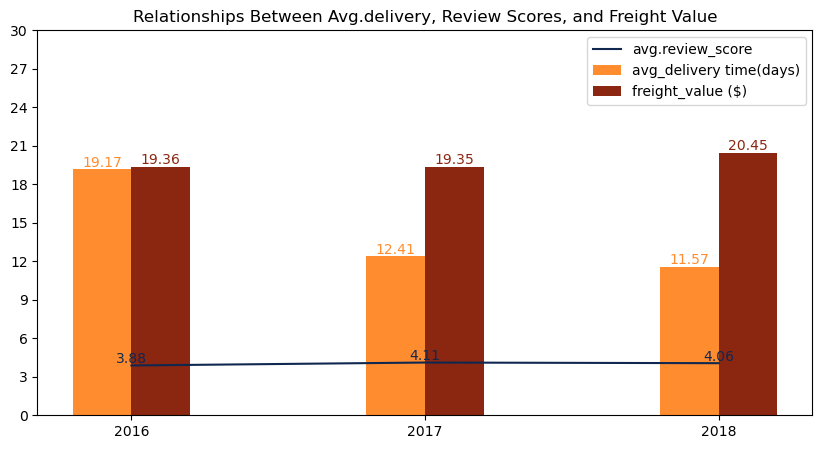

In [104]:
# Display the relationships between avg.delivery,review scores and freight value over the years from 2016-2018
fig = plt.figure(figsize=(10,5))
year = [2016,2017,2018]

avg_delivery =list(delivered_order_items.groupby(['year']).mean(numeric_only = True)['avg.delivery'])
round_d = [round(elem, 2) for elem in avg_delivery]

freight_value =list(delivered_order_items.groupby(['year']).mean(numeric_only = True)['freight_value'])
round_f = [round(elem, 2) for elem in freight_value]

review_score = list(delivered_order_items.groupby(['year']).mean(numeric_only = True)['review_score'])
round_s = [round(elem, 2) for elem in review_score]

#Create an axes

X_axis = np.arange(len(year))
width = 0.1

plt.bar(X_axis-width, round_d ,width=0.2,color='#ff8c2f', label = 'avg_delivery time(days)')

plt.bar(X_axis+width, round_f ,width=0.2,color='#8b2610', label = 'freight_value ($)')

#Add line chart to the same axes (ax1)

plt.plot(X_axis, round_s, color = '#10284F', label = 'avg.review_score')

plt.title('Relationships Between Avg.delivery, Review Scores, and Freight Value')
plt.xticks(X_axis, year)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer = True))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer = True))
plt.legend()

for i, w, m, s in zip(X_axis, round_d, round_f, round_s):
    plt.text(i - width, w + 0.2, str(w), color='#ff8c2f',
             horizontalalignment='center')

    plt.text(i + width, m + 0.2, str(m), color='#8b2610',
             horizontalalignment='center')

    plt.text(i, s + 0.2, str(s), color='#10284F',
             horizontalalignment='center')

plt.ylim(0, 30)

plt.savefig('Relationships Between Avg.delivery, Review Scores, and Freight Value.png')

plt.show()

Freight Value does not affect Avg. delivery time and Avg. review score.

### 4. Total Orders (count), Avg. Delivery Time and Freight Value across the states in Brazil

In [105]:
# Join 2 tables : delivered_order_items & customers on customer_id

delivered_order_items_customers = pd.merge(delivered_order_items, customers, on="customer_id", how="left", indicator = 'exists')
delivered_order_items_customers

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3       949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4       ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                  ...                               ...   
109275  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
109276  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
109277  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
109278  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
109279  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp   order_approved_at  \
0         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1         delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2         delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3         delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4         delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   
...             ...                      ...                 ...   
109275    delivered      2018-02-06 12:58:58 2018-02-06 13:10:37   
109276    delivered      2017-08-27 14:46:43 2017-08-27 15:04:16   
109277    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
109278    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
109279    delivered      2018-03-08 20:57:30 2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2018-07-26 14:31:00           2018-08-07 15:27:45   
2               2018-08-08 13:50:00           2018-08-17 18:06:29   
3               2017-11-22 13:39:59           2017-12-02 00:28:42   
4               2018-02-14 19:46:34           2018-02-16 18:17:02   
...                             ...                           ...   
109275          2018-02-07 23:22:42           2018-02-28 17:37:56   
109276          2017-08-28 20:52:26           2017-09-21 11:24:17   
109277          2018-01-12 15:35:03           2018-01-25 23:32:54   
109278          2018-01-12 15:35:03           2018-01-25 23:32:54   
109279          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date year_month  year  day_of_week  \
0                         2017-10-18    2017-10  2017            0   
1                         2018-08-13    2018-07  2018            1   
2                         2018-09-04    2018-08  2018            2   
3                         2017-12-15    2017-11  2017            5   
4                         2018-02-26    2018-02  2018            1   
...                              ...        ...   ...          ...   
109275                    2018-03-02    2018-02  2018            1   
109276                    2017-09-27    2017-08  2017            6   
109277                    2018-02-15    2018-01  2018            0   
109278                    2018-02-15    2018-01  2018            0   
109279                    2018-04-03    2018-03  2018            3   

        hour_of_day time_period                         review_id  \
0                10     Morning  a54f0611adc9ed256b57ede6b6eb5114   
1                20       Night  8d5266042046a06655c8db133d120ba5   
2                 8     Morning  e73b67b67587f7644d5bd1a52deb1b01   
3                19       Night  359d03e676b3c069f62cadba8dd3f6e8   
4                21       Night  e50934924e227544ba8246aeb3770dd4   
...             ...         ...                               ...   
109275           12   Afternoon  29bb71b2760d0f876dfa178a76bc4734   
109276           14   Afternoon  371579771219f6db2d830d5

In [106]:
delivered_order_items_customers.groupby(['customer_state']).mean(numeric_only = True).sort_values(['avg.delivery'], ascending = True)

year  day_of_week  hour_of_day  review_score  \
customer_state                                                        
SP              2017.575460     2.730872    14.692453      4.177842   
PR              2017.544112     2.754002    14.860370      4.148879   
MG              2017.529058     2.746782    14.852797      4.121850   
DF              2017.561163     2.781865    14.916168      4.058169   
SC              2017.536549     2.728033    15.055132      4.047010   
RJ              2017.511708     2.771285    14.688364      3.874042   
RS              2017.514071     2.736584    15.063973      4.092768   
GO              2017.526316     2.686887    14.677966      4.040143   
ES              2017.522789     2.742024    14.707384      4.015953   
MS              2017.588381     2.723115    14.559951      4.063041   
TO              2017.527508     2.504854    14.799353      4.155340   
MT              2017.536062     2.751462    14.441520      4.007797   
PE              2017.522569     2.714120    14.646412      4.020255   
BA              2017.524801     2.816936    14.830364      3.862428   
RN              2017.486486     2.660232    14.646718      4.113900   
PI              2017.546332     2.648649    14.108108      3.959459   
RO              2017.433824     2.661765    14.268382      4.073529   
PB              2017.524138     3.010345    14.436207      4.037931   
AC              2017.351648     3.175824    14.186813      4.131868   
CE              2017.495763     2.819209    14.551554      3.879944   
SE              2017.426273     2.769437    14.648794      3.898123   
MA              2017.471627     2.794451    14.411097      3.757881   
PA              2017.470019     2.895551    14.564797      3.838491   
AL              2017.490566     2.820755    14.745283      3.830189   
AM              2017.524691     2.790123    15.240741      4.111111   
AP              2017.525000     2.625000    14.962500      4.262500   
RR              2017.543478     2.978261    15.152174      3.891304   

                avg.delivery  avg.carrier  fast_delivery  order_item_id  \
customer_state                                                            
SP                  8.251860     2.716554       0.956613       1.208170   
PR                 11.466204     2.828175       0.961935       1.217360   
MG                 11.489196     2.771979       0.957095       1.181527   
DF                 12.492729     2.803251       0.939692       1.166382   
SC                 14.407334     2.894167       0.920256       1.217081   
RJ                 14.626423     2.881346       0.885428       1.186824   
RS                 14.688154     2.788776       0.942245       1.200753   
GO                 14.946922     2.595897       0.938894       1.265388   
ES                 15.041477     2.945305       0.895169       1.143118   
MS                 15.113721     2.720643       0.909765       1.197775   
TO                 17.019417     2.970874       0.902913       1.165049   
MT                 17.419103     2.660819       0.940546       1.221248   
PE                 17.726273     2.788773       0.910301       1.116319   
BA                 18.702110     2.891751       0.883256       1.173198   
RN                 18.853282     3.183398       0.911197       1.113900   
PI                 18.965251     2.745174       0.864865       1.129344   
RO                 19.283088     2.341912       0.959559       1.161765   
PB                 19.974138     3.158621       0.894828       1.198276   
AC                 20.329670     2.857143       0.967033       1.252747   
CE                 20.496469     2.904661       0.864407       1.158192   
SE                 20.833780     3.067024       0.841823       1.144772   
MA                 21.068096     3.335435       0.823455       1.160151   
PA                 23.040619     2.969052       0.897485       1.134429   
AL                 23.915094     3.186321       0.797170       1.099057   
AM           

In order to provide a clearer visualization, I export the data into Tableau and create dashboards, please follow the links here: https://public.tableau.com/views/CustomerDeliveryDataSellerLocationDistribution/Dashboard1?:language=en-US&:sid=&:display_count=n&:origin=viz_share_link

- The number of orders spreads around Sao Paulo, the farther away the area, the longer the Avg.delivery time and the higher the Avg.freight value, and vice versa.

- To go further into analyzing categories across the states:

1. There are more demand for Computer/ Sports/ Beauty products in the Northwestern region

2. There are more demand for Telephony/ Sports/ Beauty products in the Northeastern region

- The farther away from Sao Paulo, the less amount the number of Seller locations

## Sales Analysis

In this section, we are going to look at the following things:

1. Trend of Sales
2. Installments
3. Sales Performance by Category and Payment Type in Different States

The datasets we are using include: Orders, Order_payment, Order_items, Customers

### 1. Trend of Sales

In [107]:
# Merge tables : orders_dataset & payment dataset (need payment value & order year)
filted_orders_payments = pd.merge(filtered_orders, order_payments, how = 'left', on =['order_id'],indicator = True)
filted_orders_payments

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
...                                  ...                               ...   
103862  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
103863  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
103864  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
103865  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
103866  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp   order_approved_at  \
0         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3         delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
4         delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
...             ...                      ...                 ...   
103862    delivered      2017-03-09 09:54:05 2017-03-09 09:54:05   
103863    delivered      2018-02-06 12:58:58 2018-02-06 13:10:37   
103864    delivered      2017-08-27 14:46:43 2017-08-27 15:04:16   
103865    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
103866    delivered      2018-03-08 20:57:30 2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-10-04 19:55:00           2017-10-10 21:25:13   
2               2017-10-04 19:55:00           2017-10-10 21:25:13   
3               2018-07-26 14:31:00           2018-08-07 15:27:45   
4               2018-08-08 13:50:00           2018-08-17 18:06:29   
...                             ...                           ...   
103862          2017-03-10 11:18:03           2017-03-17 15:08:01   
103863          2018-02-07 23:22:42           2018-02-28 17:37:56   
103864          2017-08-28 20:52:26           2017-09-21 11:24:17   
103865          2018-01-12 15:35:03           2018-01-25 23:32:54   
103866          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date year_month  year  day_of_week  \
0                         2017-10-18    2017-10  2017            0   
1                         2017-10-18    2017-10  2017            0   
2                         2017-10-18    2017-10  2017            0   
3                         2018-08-13    2018-07  2018            1   
4                         2018-09-04    2018-08  2018            2   
...                              ...        ...   ...          ...   
103862                    2017-03-28    2017-03  2017            3   
103863                    2018-03-02    2018-02  2018            1   
103864                    2017-09-27    2017-08  2017            6   
103865                    2018-02-15    2018-01  2018            0   
103866                    2018-04-03    2018-03  2018            3   

        hour_of_day time_period  payment_sequential payment_type  \
0                10     Morning                 1.0  credit_card   
1                10     Morning                 3.0      voucher   
2                10     Morning                 2.0      voucher   
3                20       Night                 1.0       boleto   
4                 8     Morning                 1.0  credit_card   
...             ...         ...                 ...          ...   
103862            9     Morning                 1.0  credit_card   
103863           12   Afternoon                 1.0  credit_card

In [108]:
# Clean the dataset, fliter by "delivered" orders only
filted_orders_payments = filted_orders_payments.drop_duplicates(subset=['order_id'],ignore_index = True)
delivered_orders_payments = filted_orders_payments[filted_orders_payments['order_status'] == 'delivered']
delivered_orders_payments = delivered_orders_payments [~delivered_orders_payments['order_delivered_customer_date'].isnull()]
delivered_orders_payments = delivered_orders_payments.loc[delivered_orders_payments.order_delivered_customer_date > delivered_orders_payments.order_approved_at]
delivered_orders_payments = delivered_orders_payments.loc[delivered_orders_payments['_merge'] =='both']

In [109]:
# Ensure the dates are in datetime format
delivered_orders_payments['order_purchase_timestamp'] = pd.to_datetime(delivered_orders_payments['order_purchase_timestamp'])
delivered_orders_payments['order_approved_at'] = pd.to_datetime(delivered_orders_payments['order_approved_at'])
delivered_orders_payments['order_delivered_carrier_date'] = pd.to_datetime(delivered_orders_payments['order_delivered_carrier_date'])
delivered_orders_payments['order_delivered_customer_date'] = pd.to_datetime(delivered_orders_payments['order_delivered_customer_date'])
delivered_orders_payments['order_estimated_delivery_date'] = pd.to_datetime(delivered_orders_payments['order_estimated_delivery_date'])

# Change date >> only year, month, date
delivered_orders_payments['year'] = pd.to_datetime(delivered_orders_payments['order_purchase_timestamp']).dt.year
delivered_orders_payments['month'] = pd.to_datetime(delivered_orders_payments['order_purchase_timestamp']).dt.strftime('%Y-%m')
delivered_orders_payments['date'] = pd.to_datetime(delivered_orders_payments['order_purchase_timestamp'])
delivered_orders_payments

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99416  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99417  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99418  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99419  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99420  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp   order_approved_at  \
0        delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   
...            ...                      ...                 ...   
99416    delivered      2017-03-09 09:54:05 2017-03-09 09:54:05   
99417    delivered      2018-02-06 12:58:58 2018-02-06 13:10:37   
99418    delivered      2017-08-27 14:46:43 2017-08-27 15:04:16   
99419    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
99420    delivered      2018-03-08 20:57:30 2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99416          2017-03-10 11:18:03           2017-03-17 15:08:01   
99417          2018-02-07 23:22:42           2018-02-28 17:37:56   
99418          2017-08-28 20:52:26           2017-09-21 11:24:17   
99419          2018-01-12 15:35:03           2018-01-25 23:32:54   
99420          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date year_month  year  day_of_week  \
0                        2017-10-18    2017-10  2017            0   
1                        2018-08-13    2018-07  2018            1   
2                        2018-09-04    2018-08  2018            2   
3                        2017-12-15    2017-11  2017            5   
4                        2018-02-26    2018-02  2018            1   
...                             ...        ...   ...          ...   
99416                    2017-03-28    2017-03  2017            3   
99417                    2018-03-02    2018-02  2018            1   
99418                    2017-09-27    2017-08  2017            6   
99419                    2018-02-15    2018-01  2018            0   
99420                    2018-04-03    2018-03  2018            3   

       hour_of_day time_period  payment_sequential payment_type  \
0               10     Morning                 1.0  credit_card   
1               20       Night                 1.0       boleto   
2                8     Morning                 1.0  credit_card   
3               19       Night                 1.0  credit_card   
4               21       Night                 1.0  credit_card   
...            ...         ...                 ...          ...   
99416            9     Morning                 1.0  credit_card   
99417           12   Afternoon                 1.0  credit_card   
99418           14   Afternoon                 1.0  

In [110]:
delivered_orders_payments.groupby(['order_purchase_timestamp']).sum(numeric_only = True)

year  day_of_week  hour_of_day  payment_sequential  \
order_purchase_timestamp                                                       
2016-10-03 09:44:50       2016            0            9                 1.0   
2016-10-03 16:56:50       2016            0           16                 1.0   
2016-10-03 21:13:36       2016            0           21                 1.0   
2016-10-03 22:06:03       2016            0           22                 1.0   
2016-10-03 22:31:31       2016            0           22                 1.0   
...                        ...          ...          ...                 ...   
2018-08-29 12:25:59       2018            2           12                 1.0   
2018-08-29 14:18:23       2018            2           14                 1.0   
2018-08-29 14:18:28       2018            2           14                 1.0   
2018-08-29 14:52:00       2018            2           14                 1.0   
2018-08-29 15:00:37       2018            2           15                 1.0   

                          payment_installments  payment_value  
order_purchase_timestamp                                       
2016-10-03 09:44:50                        1.0          45.46  
2016-10-03 16:56:50                        1.0          39.09  
2016-10-03 21:13:36                        1.0          53.73  
2016-10-03 22:06:03                        6.0         133.46  
2016-10-03 22:31:31                        4.0          40.95  
...                                        ...            ...  
2018-08-29 12:25:59                        7.0          73.10  
2018-08-29 14:18:23                        8.0         510.96  
2018-08-29 14:18:28                        1.0          61.29  
2018-08-29 14:52:00                        1.0          33.23  
2018-08-29 15:00:37                        1.0          93.75  

[95872 rows x 6 columns]

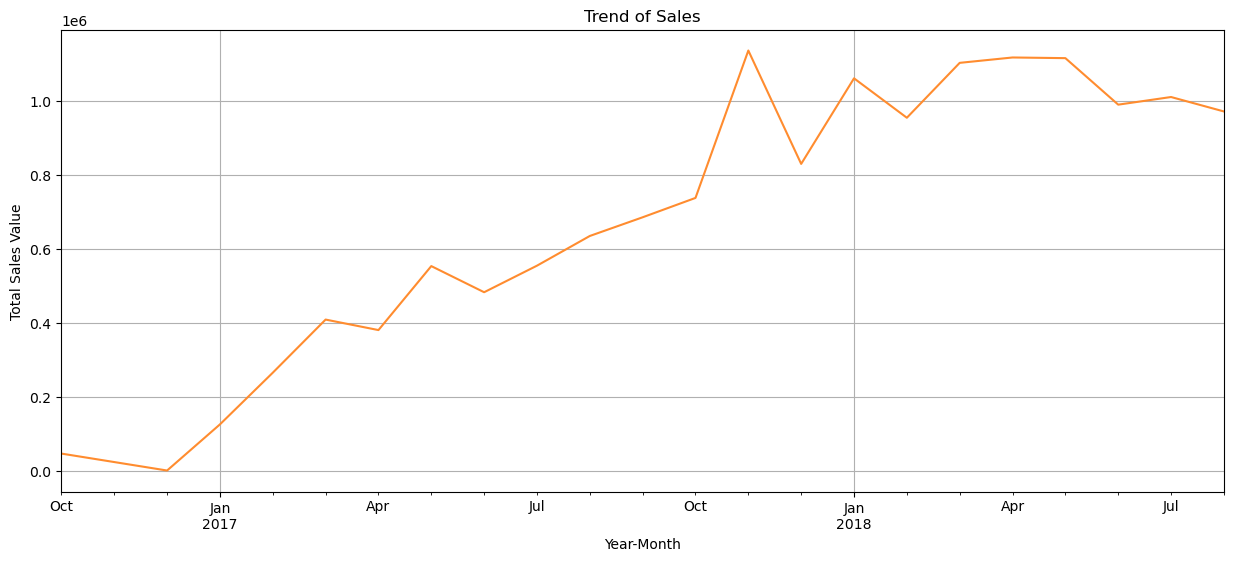

In [111]:
# Convert order_purchase_timestamp to datetime and extract year-month
delivered_orders_payments['order_purchase_timestamp'] = pd.to_datetime(delivered_orders_payments['order_purchase_timestamp'])
delivered_orders_payments['year_month'] = delivered_orders_payments['order_purchase_timestamp'].dt.to_period('M')

# Aggregate sales data by month
monthly_sales = delivered_orders_payments.groupby('year_month')['payment_value'].sum()

# Plot
plt.figure(figsize=(15,6))
monthly_sales.plot(kind='line', color='#ff8c2f')

# Set the title and labels
plt.title('Trend of Sales')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales Value')

# Enable the grid
plt.grid(True)

plt.savefig('Trend of Sales.png')

# Show the plot
plt.show()

### 2. Installment

Since we've conducted the Payment analysis earlier, we're now using the results from above and continue to do further analysis for credit card

In [112]:
# Filter only credit card orders
credit_card_orders = delivered_orders_payments.loc[delivered_orders_payments['payment_type'] == 'credit_card']
credit_card_orders

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
5      a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
...                                 ...                               ...   
99415  880675dff2150932f1601e1c07eadeeb  47cd45a6ac7b9fb16537df2ccffeb5ac   
99416  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99417  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99418  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99419  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   

      order_status order_purchase_timestamp   order_approved_at  \
0        delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2        delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   
5        delivered      2017-07-09 21:57:05 2017-07-09 22:10:13   
...            ...                      ...                 ...   
99415    delivered      2017-02-23 09:05:12 2017-02-23 09:15:11   
99416    delivered      2017-03-09 09:54:05 2017-03-09 09:54:05   
99417    delivered      2018-02-06 12:58:58 2018-02-06 13:10:37   
99418    delivered      2017-08-27 14:46:43 2017-08-27 15:04:16   
99419    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
5              2017-07-11 14:58:04           2017-07-26 10:57:55   
...                            ...                           ...   
99415          2017-03-01 10:22:52           2017-03-06 11:08:08   
99416          2017-03-10 11:18:03           2017-03-17 15:08:01   
99417          2018-02-07 23:22:42           2018-02-28 17:37:56   
99418          2017-08-28 20:52:26           2017-09-21 11:24:17   
99419          2018-01-12 15:35:03           2018-01-25 23:32:54   

      order_estimated_delivery_date year_month  year  day_of_week  \
0                        2017-10-18    2017-10  2017            0   
2                        2018-09-04    2018-08  2018            2   
3                        2017-12-15    2017-11  2017            5   
4                        2018-02-26    2018-02  2018            1   
5                        2017-08-01    2017-07  2017            6   
...                             ...        ...   ...          ...   
99415                    2017-03-22    2017-02  2017            3   
99416                    2017-03-28    2017-03  2017            3   
99417                    2018-03-02    2018-02  2018            1   
99418                    2017-09-27    2017-08  2017            6   
99419                    2018-02-15    2018-01  2018            0   

       hour_of_day time_period  payment_sequential payment_type  \
0               10     Morning                 1.0  credit_card   
2                8     Morning                 1.0  credit_card   
3               19       Night                 1.0  credit_card   
4               21       Night                 1.0  credit_card   
5               21       Night                 1.0  credit_card   
...            ...         ...                 ...          ...   
99415            9     Morning                 1.0  credit_card   
99416            9     Morning                 1.0  credit_card   
99417           12   Afternoon                 1.0  

In [113]:
# Check if there are any installments that are 0
zero_installments_check = credit_card_orders[credit_card_orders['payment_installments'] == 0]

# Modify installments that were 0 into 1
credit_card_orders['payment_installments'] = credit_card_orders['payment_installments'].replace(0.0, 1.0)

# Add a column for average payment per installment
credit_card_orders['avg.payment'] = round(credit_card_orders['payment_value'] / credit_card_orders['payment_installments'], 2)

# Descriptive statistics for specified columns
descriptive_stats = credit_card_orders[['payment_sequential', 'payment_installments', 'payment_value', 'avg.payment']].describe()

descriptive_stats, zero_installments_check.shape[0]

(       payment_sequential  payment_installments  payment_value   avg.payment
 count        73181.000000          73181.000000   73181.000000  73181.000000
 mean             1.002583              3.521105     163.671830     62.861036
 std              0.051023              2.850379     219.166902     95.642888
 min              1.000000              1.000000       0.010000      0.010000
 25%              1.000000              1.000000      63.170000     23.580000
 50%              1.000000              3.000000     107.780000     44.240000
 75%              1.000000              5.000000     181.860000     74.630000
 max              3.000000             24.000000   13664.080000  13664.080000,
 2)

Of those who use credit cards to purchase, they tend to have 3.5 installments with an average of $62 per purchase.

### 3. Sales Performance by Category and Payment Type in Different States

In [114]:
# Merge dataset
customers_delivered_order = pd.merge(delivered_orders_payments, customers, how = 'left', on =['customer_id'],indicator = "exists")
customers_delivered_order_items = pd.merge(customers_delivered_order, order_items, how = 'left', on =['order_id'],indicator = "exist")
customers_delivered_order_items_products = pd.merge(customers_delivered_order_items, products_updated, how = 'left', on =['product_id'],indicator = "merge")
customers_delivered_order_items_products

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3       949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4       ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                  ...                               ...   
110097  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
110098  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
110099  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
110100  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
110101  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp   order_approved_at  \
0         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1         delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2         delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3         delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4         delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   
...             ...                      ...                 ...   
110097    delivered      2018-02-06 12:58:58 2018-02-06 13:10:37   
110098    delivered      2017-08-27 14:46:43 2017-08-27 15:04:16   
110099    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
110100    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
110101    delivered      2018-03-08 20:57:30 2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2018-07-26 14:31:00           2018-08-07 15:27:45   
2               2018-08-08 13:50:00           2018-08-17 18:06:29   
3               2017-11-22 13:39:59           2017-12-02 00:28:42   
4               2018-02-14 19:46:34           2018-02-16 18:17:02   
...                             ...                           ...   
110097          2018-02-07 23:22:42           2018-02-28 17:37:56   
110098          2017-08-28 20:52:26           2017-09-21 11:24:17   
110099          2018-01-12 15:35:03           2018-01-25 23:32:54   
110100          2018-01-12 15:35:03           2018-01-25 23:32:54   
110101          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date year_month  year  day_of_week  \
0                         2017-10-18    2017-10  2017            0   
1                         2018-08-13    2018-07  2018            1   
2                         2018-09-04    2018-08  2018            2   
3                         2017-12-15    2017-11  2017            5   
4                         2018-02-26    2018-02  2018            1   
...                              ...        ...   ...          ...   
110097                    2018-03-02    2018-02  2018            1   
110098                    2017-09-27    2017-08  2017            6   
110099                    2018-02-15    2018-01  2018            0   
110100                    2018-02-15    2018-01  2018            0   
110101                    2018-04-03    2018-03  2018            3   

        hour_of_day time_period  payment_sequential payment_type  \
0                10     Morning                 1.0  credit_card   
1                20       Night                 1.0       boleto   
2                 8     Morning                 1.0  credit_card   
3                19       Night                 1.0  credit_card   
4                21       Night                 1.0  credit_card   
...             ...         ...                 ...          ...   
110097           12   Afternoon                 1.0  credit_card   
110098           14   Afternoon                 1.0  credit_card

In [116]:
# Save the DataFrame to CSV for Tableau dataset purpose
customers_delivered_order_items_products.to_csv('customers_delivered_order_items_products.csv', index=False)

In order to provide a clearer visualization, I export the data into Tableau and create dashboards. Please follow the links here: 
https://public.tableau.com/views/SalesPerformance_17121053778680/SalesPerformance?:language=en-US&:sid=&:display_count=n&:origin=viz_share_link

Among all, Bed, Bath, & Table > Health & Beauty > Computers Acsessories are the top 3 categories for sale from 2016 to 2018. In terms of states, most states' sales are growing from 2016 to 2018.

###### Recommendation:

1. Host promotional events in the afternoon on Monday to maximize engagement based on customers’ purchase habits and order
2. Based on reviews, sales,  geolocation, and delivery, consider setting up a consolidated terminal and ask the seller to store the goods in the warehouse set up by the Olist. Firstly, it will save the freight cost; and secondly, it can speed up the delivery time. 